In [1]:
import sys
import numpy as np

sys.path.append("/Users/david/Documents/mastersCode/ubm")
print(sys.path)

['/Users/david/Documents/mastersCode/ubm/final/models/hdphmm/hdphmmwl/testing', '/Users/david/.conda/envs/ubm/lib/python310.zip', '/Users/david/.conda/envs/ubm/lib/python3.10', '/Users/david/.conda/envs/ubm/lib/python3.10/lib-dynload', '', '/Users/david/.conda/envs/ubm/lib/python3.10/site-packages', '/Users/david/Documents/mastersCode/ubm']


In [2]:
import random
# Load state sequence and data from the pickle file
import pickle
with open('/Users/david/Documents/mastersCode/ubm/final/tests/train-test-val.pkl', 'rb') as file:
    sample_holder = pickle.load(file)

# with open('/Users/david/Documents/mastersCode/ubm/final/tests/comparison_of_fe_methods/samples_128_log_power.pickle', 'rb') as file:
#     sample_holder = pickle.load(file)

In [3]:
train = sample_holder['train']
val = sample_holder['val']
test = sample_holder['test']


In [4]:
from final import useful
def get_feature(samp):
    # add optionals here if needed
    # mfcc
    # feat = librosa.feature.mfcc(y=samp,sr=4000,n_mfcc=13).T
    feat = useful.get_log_power_feature(samp, nfft=128)
    return feat

In [5]:
train.features = []
for sample in train.samples:
    train.features.append(get_feature(sample))

val.features = []
for sample in val.samples:
    val.features.append(get_feature(sample))

test.features = []
for sample in test.samples:
    test.features.append(get_feature(sample))

In [6]:

def filter_features_by_label(sample_holder, label):
    indicis = sample_holder.sample_labels == label
    filtered_features = [item for item, condition in zip(sample_holder.features, indicis) if condition]
    return filtered_features

whale_label = 2

train_filtered_features = filter_features_by_label(train, whale_label)
val_filtered_features = filter_features_by_label(val, whale_label)
test_filtered_features = filter_features_by_label(test, whale_label)


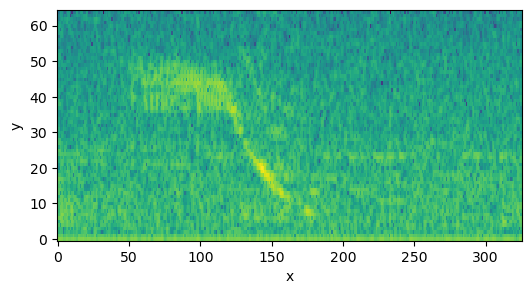

In [12]:
from final.useful import vis_helper

vis_helper(train_filtered_features[0])

In [17]:
# # get_log_power_feature()
# labels = np.array(sample_holder.sample_labels)
# samples = sample_holder.samples
# features = sample_holder.features
# from sklearn.utils import check_random_state
# rs = check_random_state(546)
# label = 1
# indices = np.array(labels == label)
# selected_features = [feats for feats, select in zip(features, indices) if select]
# lens = []
#
# for feat in selected_features[:5]:
#     lens.append(len(feat))
# lens = np.array(lens)
#
concatenated_list = [
    np.concatenate(random.sample(train_filtered_features, 8))
    for _ in range(10)
]

#
# train_filtered_features # + [train_filtered_features[2]]
#
#
#     [
#     np.concatenate(random.sample(train_filtered_features, 1))
#     for _ in range(10)
# ]

In [18]:
import final.models.hdphmm.hdphmmwl.hdphmmwl as hdphmm
from final.models.hdphmm.helpers.plot_hmm import plot_hmm_data
import final.models.hdphmm.hdphmmwl.consts as const
import final.models.hdphmm.hdphmmwl.numba_wl as numba
from importlib import reload
reload(const)
reload(numba)
reload(hdphmm)

sbp = {
    const.ALPHA0: 100,
    const.GAMMA0: 1000,
    const.KAPPA0: 50,
}
sbp[const.RHO0] = sbp[const.KAPPA0] / ( sbp[const.KAPPA0] + sbp[const.ALPHA0])
temp = 1
hdp_hmm = hdphmm.HDPHMMWL(concatenated_list, 15, iterations=15, sbp=sbp, feature_a=11, feature_b=12)

# hdp_hmm.gamma0 = 0.01
# hdp_hmm.nu0 = 200
# hdp_hmm.V0 = np.eye(hdp_hmm.D) * 1000

sbp given


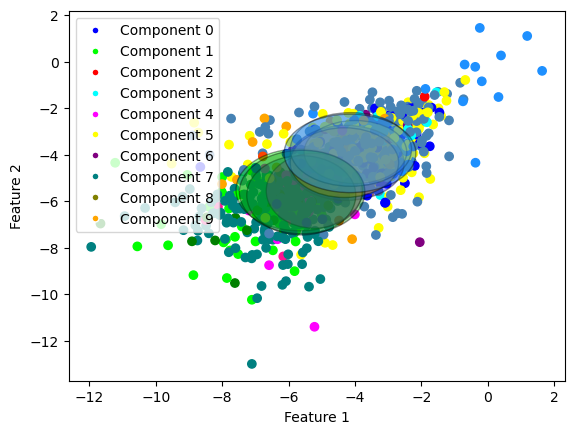

In [19]:
import final.models.hdphmm.helpers.plot_hmm as plot_hmm
reload(plot_hmm)
hdp_hmm.create_hmm()
hdp_hmm.plot_hmmlearn(15,16,1)

iterations per sample:  1
Gibb sampling on sample index:  0 outer it:  0
it:  0  || Likelihood:  -21608.205788044103  || n_components:  15
Gibb sampling on sample index:  1 outer it:  0
it:  0  || Likelihood:  -22316.58525425763  || n_components:  15
Gibb sampling on sample index:  2 outer it:  0
it:  0  || Likelihood:  -21951.981444554873  || n_components:  13
Gibb sampling on sample index:  3 outer it:  0
it:  0  || Likelihood:  -22219.61108624631  || n_components:  13
Gibb sampling on sample index:  4 outer it:  0
it:  0  || Likelihood:  -23415.3204730361  || n_components:  10
Gibb sampling on sample index:  5 outer it:  0
it:  0  || Likelihood:  -22111.299673924485  || n_components:  11
Gibb sampling on sample index:  6 outer it:  0
it:  0  || Likelihood:  -22544.045703271528  || n_components:  7
Gibb sampling on sample index:  7 outer it:  0
it:  0  || Likelihood:  -23278.11931677998  || n_components:  8
Gibb sampling on sample index:  8 outer it:  0
it:  0  || Likelihood:  -22465

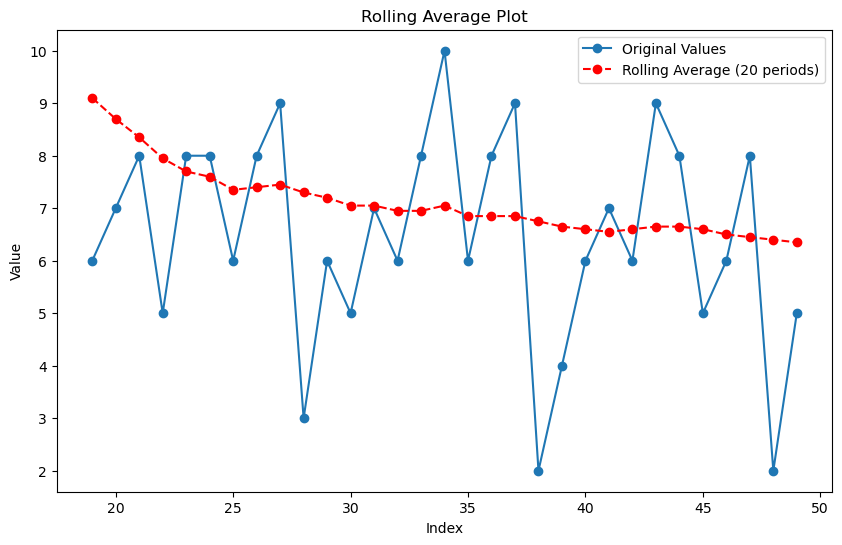

7.54
2.714479692316743
Gibb sampling on sample index:  0 outer it:  5
it:  0  || Likelihood:  -21946.65665565708  || n_components:  5
Gibb sampling on sample index:  1 outer it:  5
it:  0  || Likelihood:  -22766.274198432067  || n_components:  6
Gibb sampling on sample index:  2 outer it:  5
it:  0  || Likelihood:  -21930.173888632566  || n_components:  7
Gibb sampling on sample index:  3 outer it:  5
it:  0  || Likelihood:  -22366.21927625555  || n_components:  9
Gibb sampling on sample index:  4 outer it:  5
it:  0  || Likelihood:  -24217.41310090027  || n_components:  8
Gibb sampling on sample index:  5 outer it:  5
it:  0  || Likelihood:  -22310.463614377837  || n_components:  6
Gibb sampling on sample index:  6 outer it:  5
it:  0  || Likelihood:  -22806.80953205632  || n_components:  6
Gibb sampling on sample index:  7 outer it:  5
it:  0  || Likelihood:  -23432.68044531857  || n_components:  8
Gibb sampling on sample index:  8 outer it:  5
it:  0  || Likelihood:  -22819.93381671

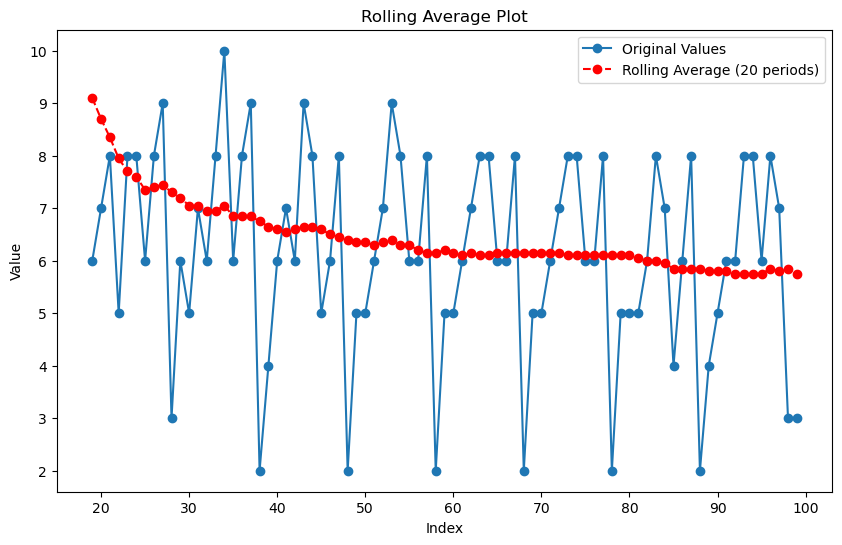

5.98
1.8164801127455263
Gibb sampling on sample index:  0 outer it:  10
it:  0  || Likelihood:  -21914.299836784245  || n_components:  5
Gibb sampling on sample index:  1 outer it:  10
it:  0  || Likelihood:  -22740.07572463867  || n_components:  6
Gibb sampling on sample index:  2 outer it:  10
it:  0  || Likelihood:  -22131.613648275896  || n_components:  4
Gibb sampling on sample index:  3 outer it:  10
it:  0  || Likelihood:  -22374.889935825013  || n_components:  5
Gibb sampling on sample index:  4 outer it:  10
it:  0  || Likelihood:  -24201.86875664482  || n_components:  8
Gibb sampling on sample index:  5 outer it:  10
it:  0  || Likelihood:  -22317.830341011686  || n_components:  4
Gibb sampling on sample index:  6 outer it:  10
it:  0  || Likelihood:  -22828.090994614686  || n_components:  8
Gibb sampling on sample index:  7 outer it:  10
it:  0  || Likelihood:  -23468.13439462043  || n_components:  7
Gibb sampling on sample index:  8 outer it:  10
it:  0  || Likelihood:  -22

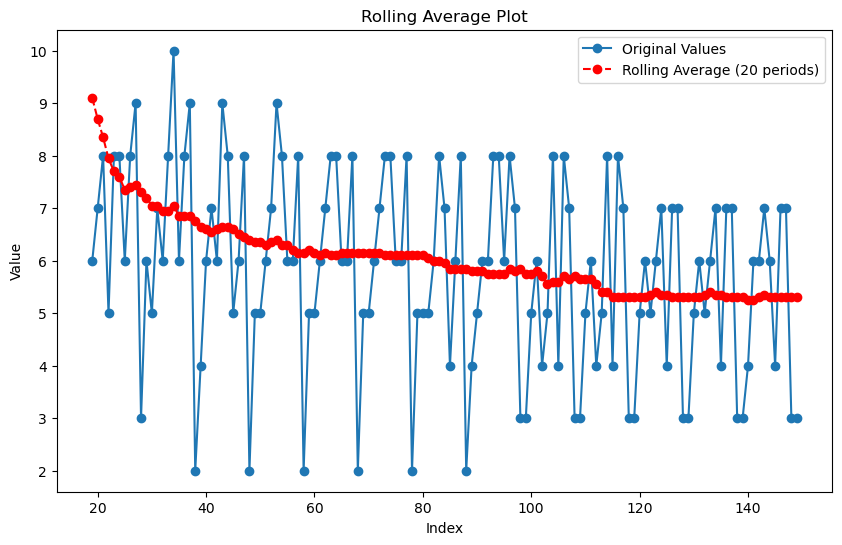

5.3
1.6278820596099706
5.64
1.7579533554676587
Gibb sampling on sample index:  0 outer it:  15
it:  0  || Likelihood:  -21885.077147709097  || n_components:  5
Gibb sampling on sample index:  1 outer it:  15
it:  0  || Likelihood:  -22784.095362343396  || n_components:  6
Gibb sampling on sample index:  2 outer it:  15
it:  0  || Likelihood:  -22054.56283329471  || n_components:  5
Gibb sampling on sample index:  3 outer it:  15
it:  0  || Likelihood:  -22386.13656315463  || n_components:  6
Gibb sampling on sample index:  4 outer it:  15
it:  0  || Likelihood:  -24349.22658893068  || n_components:  7
Gibb sampling on sample index:  5 outer it:  15
it:  0  || Likelihood:  -22345.929770001323  || n_components:  4
Gibb sampling on sample index:  6 outer it:  15
it:  0  || Likelihood:  -22824.354260011034  || n_components:  7
Gibb sampling on sample index:  7 outer it:  15
it:  0  || Likelihood:  -23509.470714006144  || n_components:  7
Gibb sampling on sample index:  8 outer it:  15
it: 

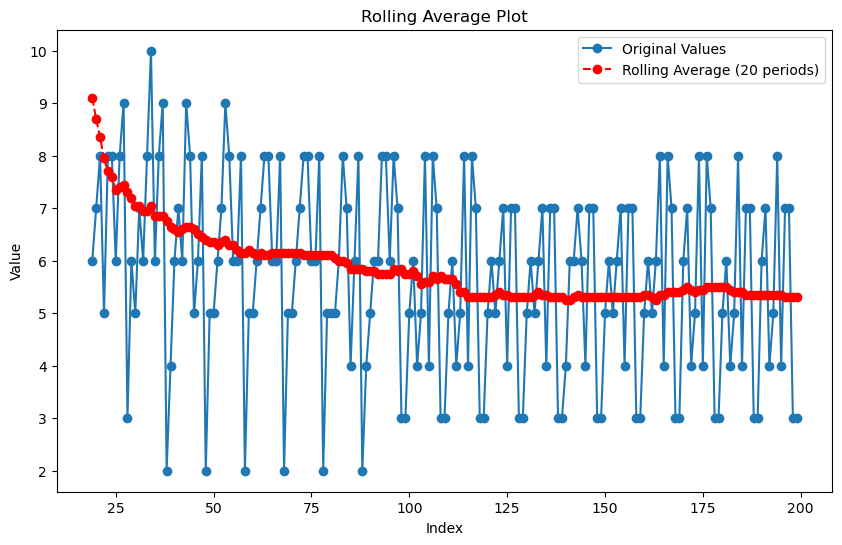

5.38
1.7075128110793196
5.34
1.668652150689292
Gibb sampling on sample index:  0 outer it:  20
it:  0  || Likelihood:  -21834.574855894498  || n_components:  6
Gibb sampling on sample index:  1 outer it:  20
it:  0  || Likelihood:  -22744.922689558767  || n_components:  7
Gibb sampling on sample index:  2 outer it:  20
it:  0  || Likelihood:  -22095.47022492823  || n_components:  4
Gibb sampling on sample index:  3 outer it:  20
it:  0  || Likelihood:  -22380.489709754027  || n_components:  5
Gibb sampling on sample index:  4 outer it:  20
it:  0  || Likelihood:  -23914.069684800907  || n_components:  8
Gibb sampling on sample index:  5 outer it:  20
it:  0  || Likelihood:  -22360.284527024804  || n_components:  5
Gibb sampling on sample index:  6 outer it:  20
it:  0  || Likelihood:  -22826.117862811607  || n_components:  7
Gibb sampling on sample index:  7 outer it:  20
it:  0  || Likelihood:  -23438.058455533497  || n_components:  7
Gibb sampling on sample index:  8 outer it:  20
it

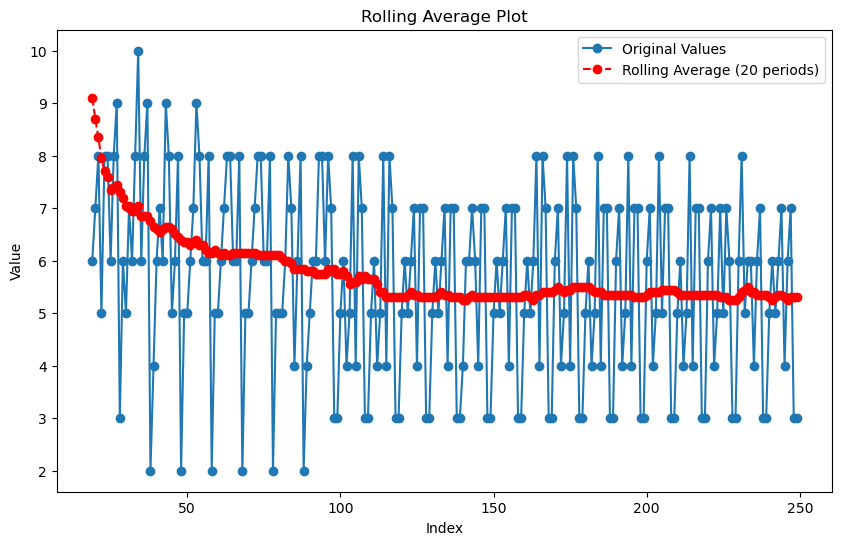

5.32
1.5676734353812338
5.35
1.6393596310755
Gibb sampling on sample index:  0 outer it:  25
it:  0  || Likelihood:  -21957.10293516079  || n_components:  5
Gibb sampling on sample index:  1 outer it:  25
it:  0  || Likelihood:  -22756.205329121683  || n_components:  6
Gibb sampling on sample index:  2 outer it:  25
it:  0  || Likelihood:  -21990.421755268893  || n_components:  5
Gibb sampling on sample index:  3 outer it:  25
it:  0  || Likelihood:  -22400.87949974003  || n_components:  6
Gibb sampling on sample index:  4 outer it:  25
it:  0  || Likelihood:  -23907.64636823321  || n_components:  8
Gibb sampling on sample index:  5 outer it:  25
it:  0  || Likelihood:  -22361.708259324194  || n_components:  5
Gibb sampling on sample index:  6 outer it:  25
it:  0  || Likelihood:  -22815.517777877445  || n_components:  5
Gibb sampling on sample index:  7 outer it:  25
it:  0  || Likelihood:  -23445.94201910704  || n_components:  5
Gibb sampling on sample index:  8 outer it:  25
it:  0 

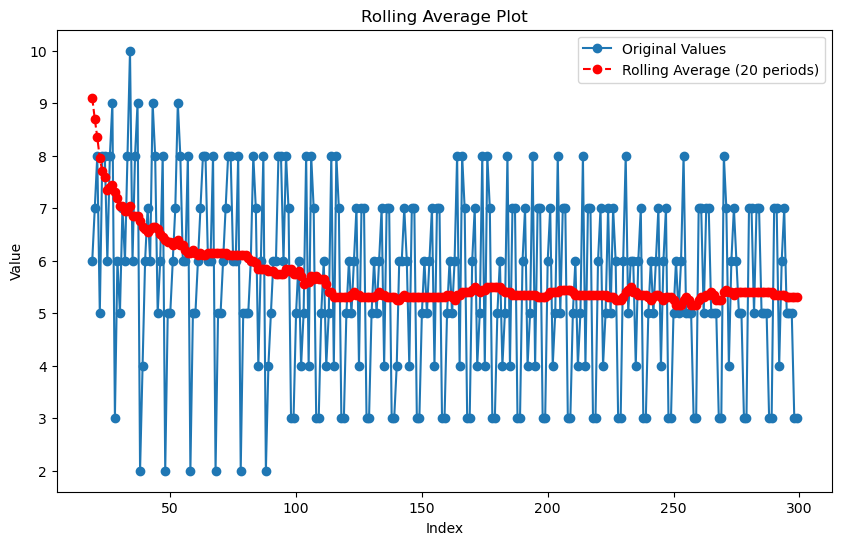

5.3
1.5
5.31
1.5342424840943494
Gibb sampling on sample index:  0 outer it:  30
it:  0  || Likelihood:  -21928.425505995965  || n_components:  7
Gibb sampling on sample index:  1 outer it:  30
it:  0  || Likelihood:  -22768.647394557447  || n_components:  7
Gibb sampling on sample index:  2 outer it:  30
it:  0  || Likelihood:  -22113.41024684907  || n_components:  4
Gibb sampling on sample index:  3 outer it:  30
it:  0  || Likelihood:  -22351.196311000785  || n_components:  6
Gibb sampling on sample index:  4 outer it:  30
it:  0  || Likelihood:  -24273.302953079354  || n_components:  7
Gibb sampling on sample index:  5 outer it:  30
it:  0  || Likelihood:  -22338.004791024032  || n_components:  5
Gibb sampling on sample index:  6 outer it:  30
it:  0  || Likelihood:  -22806.925445716406  || n_components:  5
Gibb sampling on sample index:  7 outer it:  30
it:  0  || Likelihood:  -23417.208598887784  || n_components:  5
Gibb sampling on sample index:  8 outer it:  30
it:  0  || Likeli

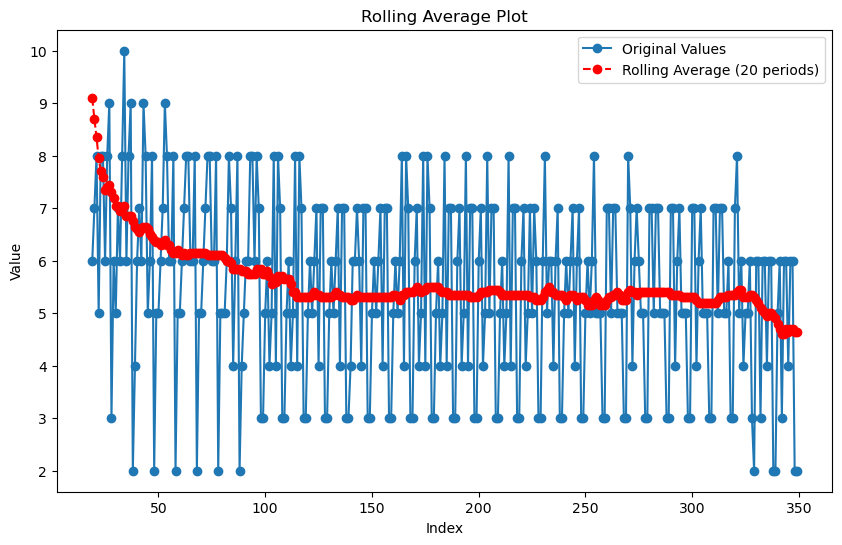

5.02
1.6308280105516952
5.16
1.573022568178855
Gibb sampling on sample index:  0 outer it:  35
it:  0  || Likelihood:  -21920.019479638715  || n_components:  5
Gibb sampling on sample index:  1 outer it:  35
it:  0  || Likelihood:  -22711.085242317142  || n_components:  6
Gibb sampling on sample index:  2 outer it:  35
it:  0  || Likelihood:  -22041.003998510685  || n_components:  3
Gibb sampling on sample index:  3 outer it:  35
it:  0  || Likelihood:  -22350.07293191435  || n_components:  6
Gibb sampling on sample index:  4 outer it:  35
it:  0  || Likelihood:  -24351.847998096237  || n_components:  5
Gibb sampling on sample index:  5 outer it:  35
it:  0  || Likelihood:  -22350.01219040118  || n_components:  4
Gibb sampling on sample index:  6 outer it:  35
it:  0  || Likelihood:  -22811.977031163162  || n_components:  6
Gibb sampling on sample index:  7 outer it:  35
it:  0  || Likelihood:  -23507.7694252816  || n_components:  7
Gibb sampling on sample index:  8 outer it:  35
it:  

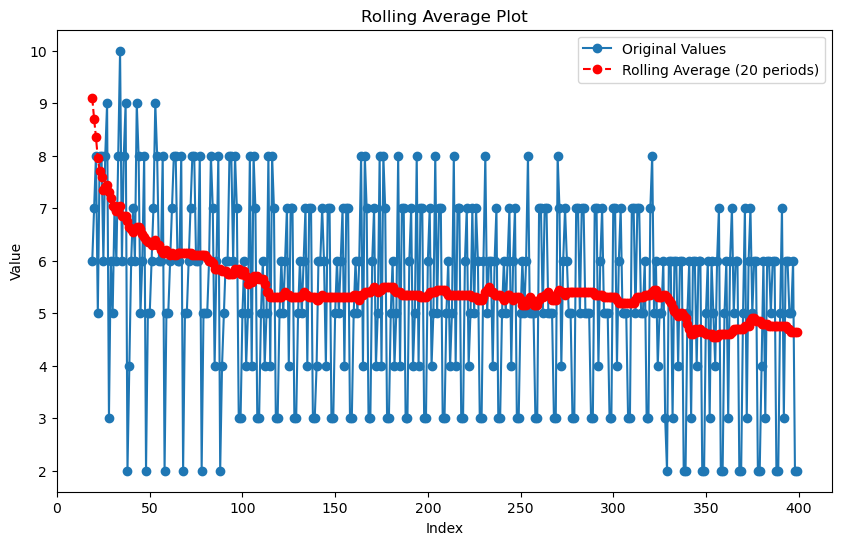

4.72
1.70926884953772
4.87
1.677229859023503
Gibb sampling on sample index:  0 outer it:  40
it:  0  || Likelihood:  -21882.197482593827  || n_components:  6
Gibb sampling on sample index:  1 outer it:  40
it:  0  || Likelihood:  -22699.384588914792  || n_components:  7
Gibb sampling on sample index:  2 outer it:  40
it:  0  || Likelihood:  -22122.14622256557  || n_components:  2
Gibb sampling on sample index:  3 outer it:  40
it:  0  || Likelihood:  -22334.291235288558  || n_components:  6
Gibb sampling on sample index:  4 outer it:  40
it:  0  || Likelihood:  -24269.95629303809  || n_components:  7
Gibb sampling on sample index:  5 outer it:  40
it:  0  || Likelihood:  -22359.680104609437  || n_components:  5
Gibb sampling on sample index:  6 outer it:  40
it:  0  || Likelihood:  -22817.943576412134  || n_components:  6
Gibb sampling on sample index:  7 outer it:  40
it:  0  || Likelihood:  -23450.11082459318  || n_components:  6
Gibb sampling on sample index:  8 outer it:  40
it:  0

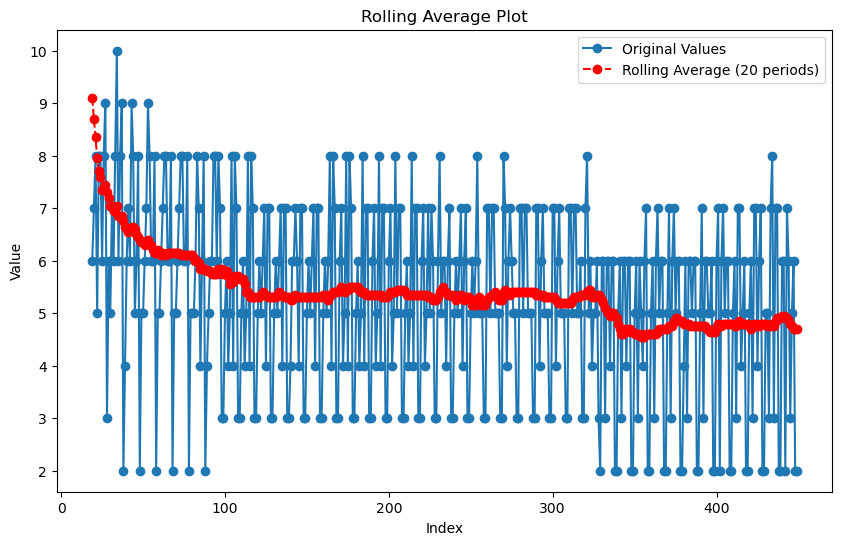

4.78
1.9625493624365222
4.75
1.840516231930596
Gibb sampling on sample index:  0 outer it:  45
it:  0  || Likelihood:  -21881.491153942738  || n_components:  5
Gibb sampling on sample index:  1 outer it:  45
it:  0  || Likelihood:  -22745.407888655278  || n_components:  5
Gibb sampling on sample index:  2 outer it:  45
it:  0  || Likelihood:  -21994.305898547645  || n_components:  3
Gibb sampling on sample index:  3 outer it:  45
it:  0  || Likelihood:  -22388.063205988026  || n_components:  7
Gibb sampling on sample index:  4 outer it:  45
it:  0  || Likelihood:  -24240.372224686947  || n_components:  6
Gibb sampling on sample index:  5 outer it:  45
it:  0  || Likelihood:  -22333.329773826885  || n_components:  3
Gibb sampling on sample index:  6 outer it:  45
it:  0  || Likelihood:  -22814.474480847326  || n_components:  5
Gibb sampling on sample index:  7 outer it:  45
it:  0  || Likelihood:  -23443.053518536894  || n_components:  6
Gibb sampling on sample index:  8 outer it:  45
i

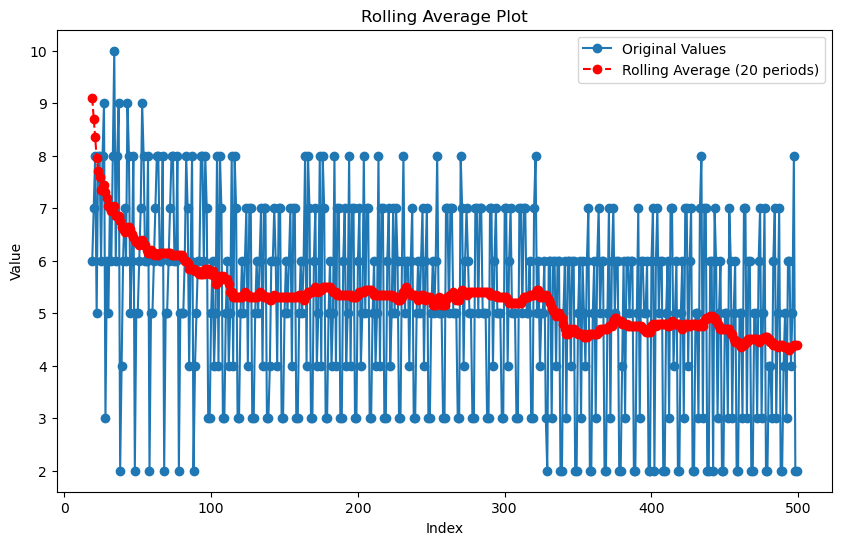

4.46
1.7912007146045918
4.62
1.8856298682403183
Gibb sampling on sample index:  0 outer it:  50
it:  0  || Likelihood:  -21920.09779404925  || n_components:  4
Gibb sampling on sample index:  1 outer it:  50
it:  0  || Likelihood:  -22747.72800734109  || n_components:  4
Gibb sampling on sample index:  2 outer it:  50
it:  0  || Likelihood:  -21948.312244293138  || n_components:  3
Gibb sampling on sample index:  3 outer it:  50
it:  0  || Likelihood:  -22359.777424107884  || n_components:  6
Gibb sampling on sample index:  4 outer it:  50
it:  0  || Likelihood:  -24157.50887977392  || n_components:  8
Gibb sampling on sample index:  5 outer it:  50
it:  0  || Likelihood:  -22329.79302494959  || n_components:  3
Gibb sampling on sample index:  6 outer it:  50
it:  0  || Likelihood:  -22817.719061988282  || n_components:  6
Gibb sampling on sample index:  7 outer it:  50
it:  0  || Likelihood:  -23479.884249630824  || n_components:  7
Gibb sampling on sample index:  8 outer it:  50
it: 

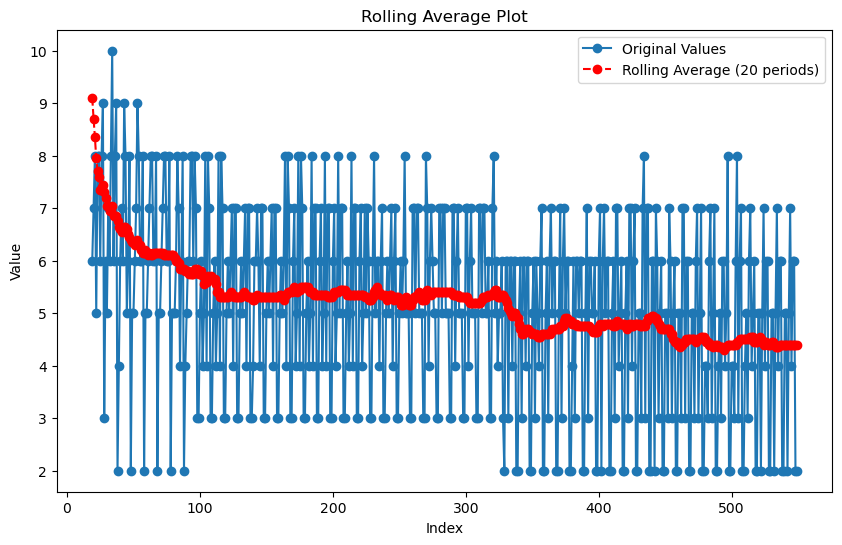

4.42
1.778651174345324
4.44
1.7850490189347743
Gibb sampling on sample index:  0 outer it:  55
it:  0  || Likelihood:  -21919.037910705007  || n_components:  5
Gibb sampling on sample index:  1 outer it:  55
it:  0  || Likelihood:  -22741.46116122735  || n_components:  5
Gibb sampling on sample index:  2 outer it:  55
it:  0  || Likelihood:  -22097.791215403624  || n_components:  2
Gibb sampling on sample index:  3 outer it:  55
it:  0  || Likelihood:  -22394.46353242938  || n_components:  5
Gibb sampling on sample index:  4 outer it:  55
it:  0  || Likelihood:  -24157.80175650056  || n_components:  7
Gibb sampling on sample index:  5 outer it:  55
it:  0  || Likelihood:  -22341.703511126994  || n_components:  4
Gibb sampling on sample index:  6 outer it:  55
it:  0  || Likelihood:  -22820.82873360978  || n_components:  6
Gibb sampling on sample index:  7 outer it:  55
it:  0  || Likelihood:  -23465.92510101964  || n_components:  6
Gibb sampling on sample index:  8 outer it:  55
it:  0

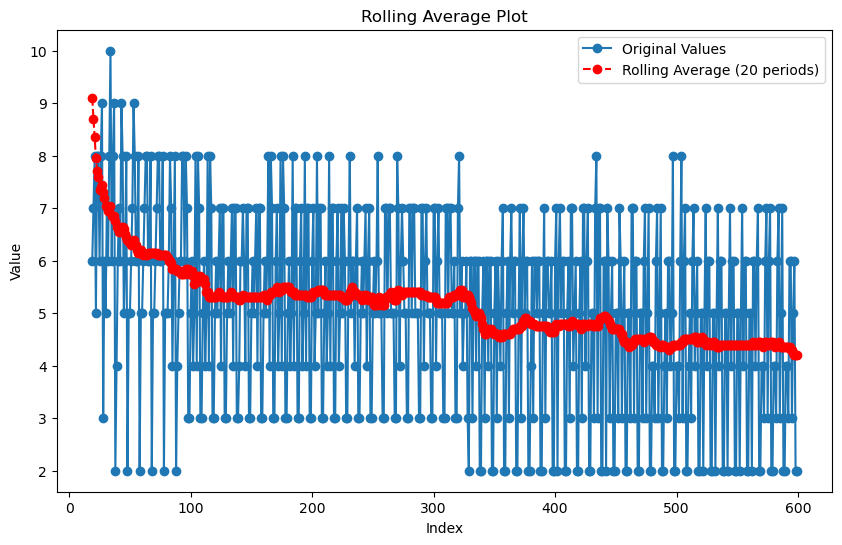

4.34
1.7505427729707148
4.38
1.765106229097841
Gibb sampling on sample index:  0 outer it:  60
it:  0  || Likelihood:  -21928.29242222411  || n_components:  4
Gibb sampling on sample index:  1 outer it:  60
it:  0  || Likelihood:  -22742.54033758444  || n_components:  4
Gibb sampling on sample index:  2 outer it:  60
it:  0  || Likelihood:  -21962.095776594073  || n_components:  3
Gibb sampling on sample index:  3 outer it:  60
it:  0  || Likelihood:  -22414.629662162526  || n_components:  6
Gibb sampling on sample index:  4 outer it:  60
it:  0  || Likelihood:  -24251.88684369348  || n_components:  6
Gibb sampling on sample index:  5 outer it:  60
it:  0  || Likelihood:  -22329.406075822328  || n_components:  3
Gibb sampling on sample index:  6 outer it:  60
it:  0  || Likelihood:  -22816.614671930518  || n_components:  4
Gibb sampling on sample index:  7 outer it:  60
it:  0  || Likelihood:  -23465.38817012738  || n_components:  6
Gibb sampling on sample index:  8 outer it:  60
it:  

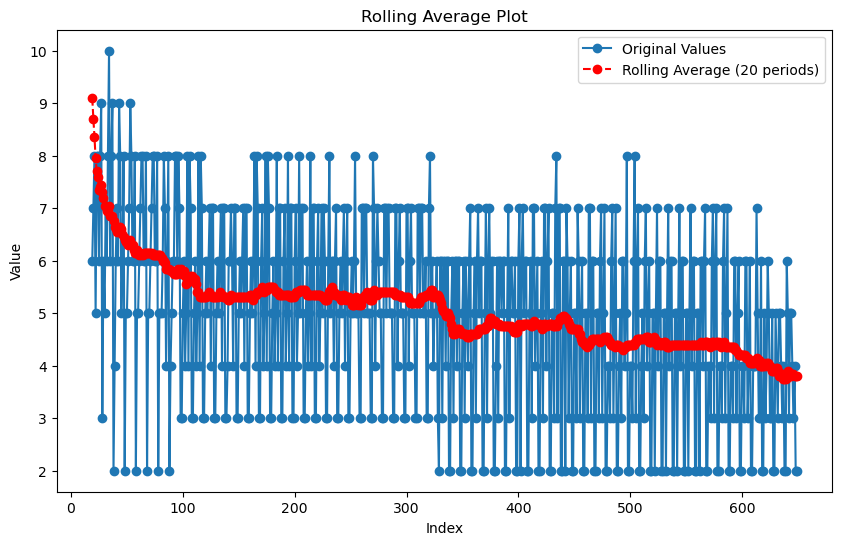

3.88
1.36586968631711
4.11
1.5867892109539943
Gibb sampling on sample index:  0 outer it:  65
it:  0  || Likelihood:  -21916.13196631861  || n_components:  5
Gibb sampling on sample index:  1 outer it:  65
it:  0  || Likelihood:  -22854.543888189655  || n_components:  4
Gibb sampling on sample index:  2 outer it:  65
it:  0  || Likelihood:  -22043.594293125112  || n_components:  3
Gibb sampling on sample index:  3 outer it:  65
it:  0  || Likelihood:  -22432.14961590758  || n_components:  5
Gibb sampling on sample index:  4 outer it:  65
it:  0  || Likelihood:  -24252.83383910549  || n_components:  5
Gibb sampling on sample index:  5 outer it:  65
it:  0  || Likelihood:  -22345.34417432336  || n_components:  4
Gibb sampling on sample index:  6 outer it:  65
it:  0  || Likelihood:  -22797.555797033918  || n_components:  4
Gibb sampling on sample index:  7 outer it:  65
it:  0  || Likelihood:  -23499.855660216792  || n_components:  5
Gibb sampling on sample index:  8 outer it:  65
it:  0

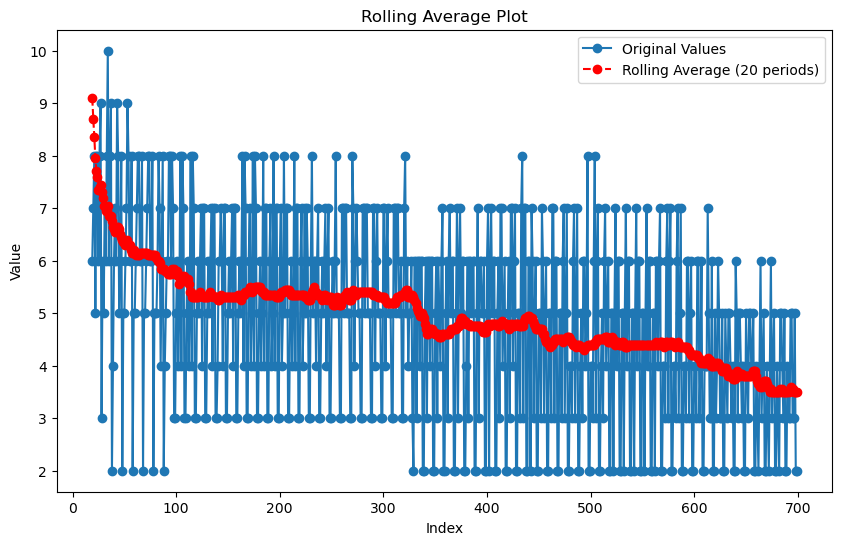

3.58
1.218031198286809
3.73
1.302727907124124
Gibb sampling on sample index:  0 outer it:  70
it:  0  || Likelihood:  -21925.29172623145  || n_components:  4
Gibb sampling on sample index:  1 outer it:  70
it:  0  || Likelihood:  -22837.82545475844  || n_components:  3
Gibb sampling on sample index:  2 outer it:  70
it:  0  || Likelihood:  -21960.644030790198  || n_components:  3
Gibb sampling on sample index:  3 outer it:  70
it:  0  || Likelihood:  -22392.385628150358  || n_components:  5
Gibb sampling on sample index:  4 outer it:  70
it:  0  || Likelihood:  -24203.361094388456  || n_components:  6
Gibb sampling on sample index:  5 outer it:  70
it:  0  || Likelihood:  -22357.495485248222  || n_components:  3
Gibb sampling on sample index:  6 outer it:  70
it:  0  || Likelihood:  -22821.30588697261  || n_components:  4
Gibb sampling on sample index:  7 outer it:  70
it:  0  || Likelihood:  -23474.641630892223  || n_components:  5
Gibb sampling on sample index:  8 outer it:  70
it:  

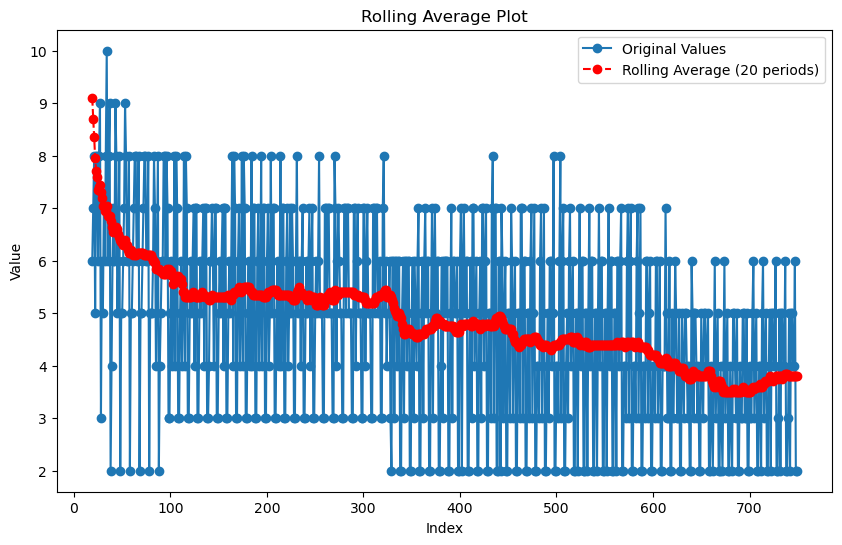

3.78
1.3607350954539243
3.68
1.295221988695374
Gibb sampling on sample index:  0 outer it:  75
it:  0  || Likelihood:  -21935.87575599681  || n_components:  4
Gibb sampling on sample index:  1 outer it:  75
it:  0  || Likelihood:  -22777.396254326653  || n_components:  4
Gibb sampling on sample index:  2 outer it:  75
it:  0  || Likelihood:  -22103.687106459653  || n_components:  2
Gibb sampling on sample index:  3 outer it:  75
it:  0  || Likelihood:  -22356.396591828237  || n_components:  5
Gibb sampling on sample index:  4 outer it:  75
it:  0  || Likelihood:  -24290.425040220387  || n_components:  6
Gibb sampling on sample index:  5 outer it:  75
it:  0  || Likelihood:  -22351.3520086356  || n_components:  3
Gibb sampling on sample index:  6 outer it:  75
it:  0  || Likelihood:  -22820.709400431595  || n_components:  4
Gibb sampling on sample index:  7 outer it:  75
it:  0  || Likelihood:  -23429.981327724243  || n_components:  5
Gibb sampling on sample index:  8 outer it:  75
it: 

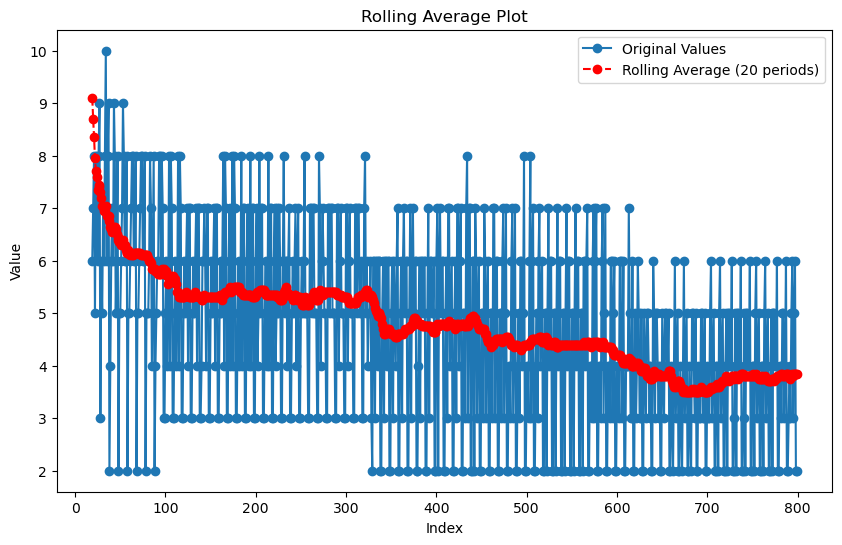

3.8
1.3564659966250536
3.79
1.3586390249069102
Gibb sampling on sample index:  0 outer it:  80
it:  0  || Likelihood:  -21927.642572209414  || n_components:  3
Gibb sampling on sample index:  1 outer it:  80
it:  0  || Likelihood:  -22762.114049559394  || n_components:  4
Gibb sampling on sample index:  2 outer it:  80
it:  0  || Likelihood:  -22109.131613467696  || n_components:  3
Gibb sampling on sample index:  3 outer it:  80
it:  0  || Likelihood:  -22365.061648521503  || n_components:  5
Gibb sampling on sample index:  4 outer it:  80
it:  0  || Likelihood:  -24205.22884297396  || n_components:  6
Gibb sampling on sample index:  5 outer it:  80
it:  0  || Likelihood:  -22352.012780680645  || n_components:  3
Gibb sampling on sample index:  6 outer it:  80
it:  0  || Likelihood:  -22808.25102746127  || n_components:  5
Gibb sampling on sample index:  7 outer it:  80
it:  0  || Likelihood:  -23437.70747288978  || n_components:  6
Gibb sampling on sample index:  8 outer it:  80
it: 

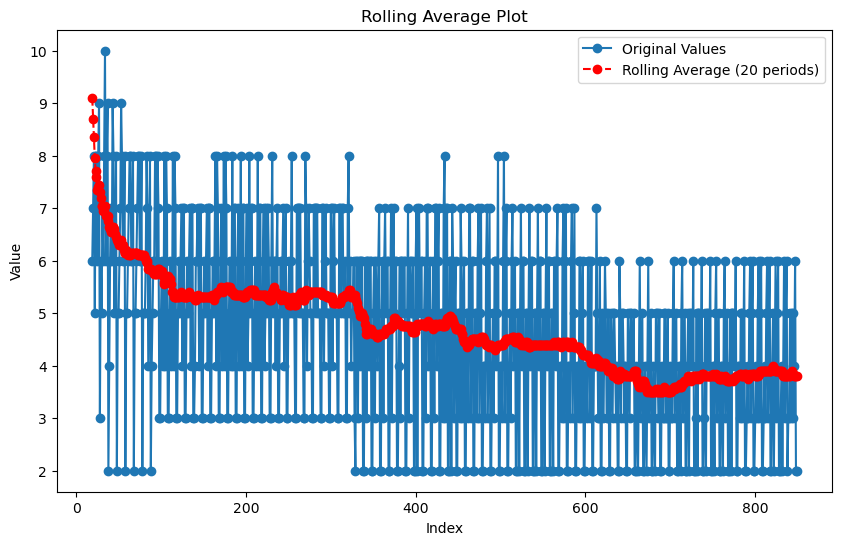

3.86
1.4284257068535275
3.83
1.3932336487466845
Gibb sampling on sample index:  0 outer it:  85
it:  0  || Likelihood:  -21919.96609823231  || n_components:  4
Gibb sampling on sample index:  1 outer it:  85
it:  0  || Likelihood:  -22731.35946685413  || n_components:  5
Gibb sampling on sample index:  2 outer it:  85
it:  0  || Likelihood:  -22032.83341289428  || n_components:  3
Gibb sampling on sample index:  3 outer it:  85
it:  0  || Likelihood:  -22368.48278770713  || n_components:  5
Gibb sampling on sample index:  4 outer it:  85
it:  0  || Likelihood:  -23952.975254734876  || n_components:  6
Gibb sampling on sample index:  5 outer it:  85
it:  0  || Likelihood:  -22351.941259203457  || n_components:  4
Gibb sampling on sample index:  6 outer it:  85
it:  0  || Likelihood:  -22780.4693347976  || n_components:  5
Gibb sampling on sample index:  7 outer it:  85
it:  0  || Likelihood:  -23428.663506698376  || n_components:  6
Gibb sampling on sample index:  8 outer it:  85
it:  0

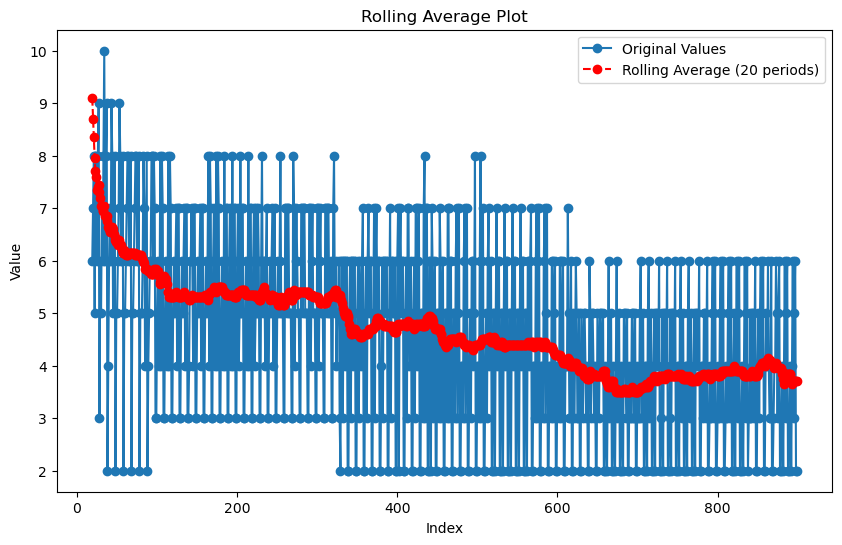

3.9
1.445683229480096
3.88
1.4372195378577346
Gibb sampling on sample index:  0 outer it:  90
it:  0  || Likelihood:  -21928.016766677487  || n_components:  3
Gibb sampling on sample index:  1 outer it:  90
it:  0  || Likelihood:  -22810.859323641955  || n_components:  4
Gibb sampling on sample index:  2 outer it:  90
it:  0  || Likelihood:  -22102.10564674759  || n_components:  2
Gibb sampling on sample index:  3 outer it:  90
it:  0  || Likelihood:  -22395.824576548384  || n_components:  4
Gibb sampling on sample index:  4 outer it:  90
it:  0  || Likelihood:  -24210.56898359997  || n_components:  6
Gibb sampling on sample index:  5 outer it:  90
it:  0  || Likelihood:  -22320.745470677706  || n_components:  3
Gibb sampling on sample index:  6 outer it:  90
it:  0  || Likelihood:  -22824.24805630389  || n_components:  5
Gibb sampling on sample index:  7 outer it:  90
it:  0  || Likelihood:  -23428.20075441429  || n_components:  6
Gibb sampling on sample index:  8 outer it:  90
it:  0

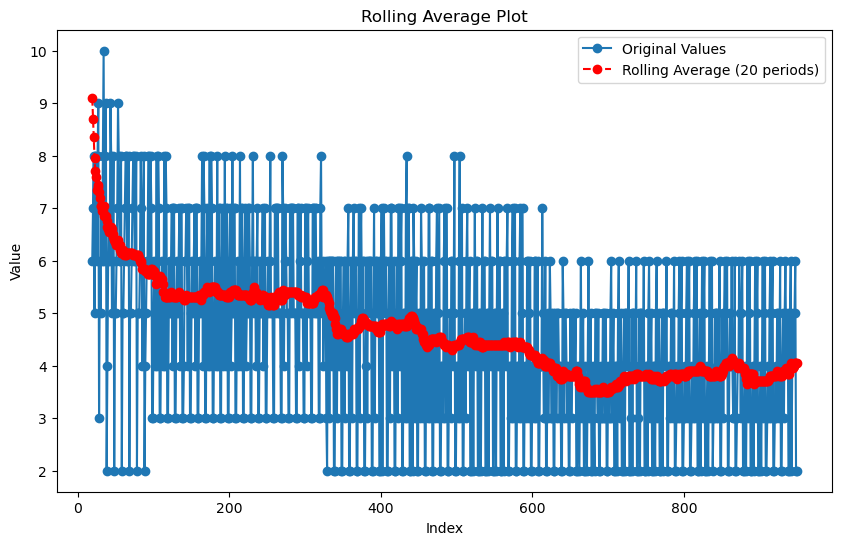

3.88
1.4091131963046832
3.89
1.4275503493747603
Gibb sampling on sample index:  0 outer it:  95
it:  0  || Likelihood:  -21921.161853474394  || n_components:  3
Gibb sampling on sample index:  1 outer it:  95
it:  0  || Likelihood:  -22761.06486793042  || n_components:  4
Gibb sampling on sample index:  2 outer it:  95
it:  0  || Likelihood:  -22127.843676389803  || n_components:  2
Gibb sampling on sample index:  3 outer it:  95
it:  0  || Likelihood:  -22402.707221050838  || n_components:  4
Gibb sampling on sample index:  4 outer it:  95
it:  0  || Likelihood:  -24196.507577463533  || n_components:  6
Gibb sampling on sample index:  5 outer it:  95
it:  0  || Likelihood:  -22375.59924970935  || n_components:  3
Gibb sampling on sample index:  6 outer it:  95
it:  0  || Likelihood:  -22839.620780469286  || n_components:  5
Gibb sampling on sample index:  7 outer it:  95
it:  0  || Likelihood:  -23415.884101682102  || n_components:  6
Gibb sampling on sample index:  8 outer it:  95
it

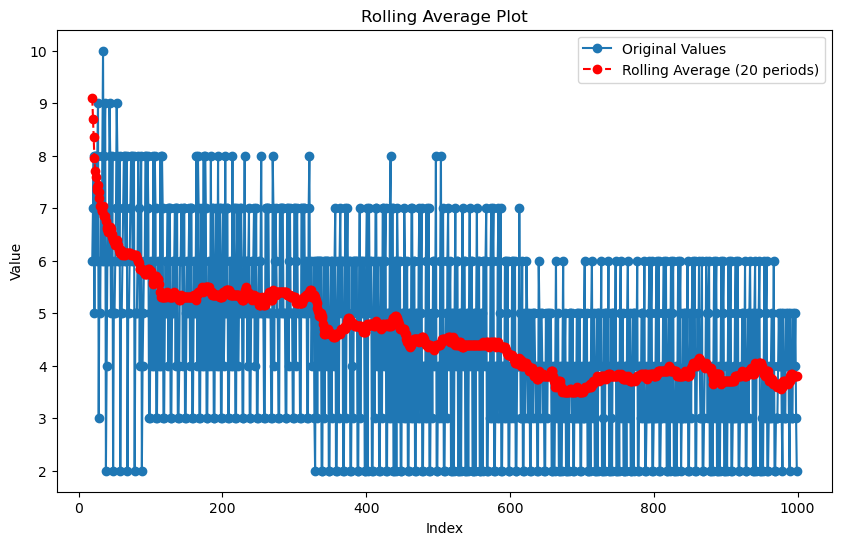

3.7
1.1357816691600546
3.79
1.282926342390708
Gibb sampling on sample index:  0 outer it:  100
it:  0  || Likelihood:  -21930.03762746581  || n_components:  5
Gibb sampling on sample index:  1 outer it:  100
it:  0  || Likelihood:  -22806.828469542677  || n_components:  4
Gibb sampling on sample index:  2 outer it:  100
it:  0  || Likelihood:  -22127.377002854093  || n_components:  3
Gibb sampling on sample index:  3 outer it:  100
it:  0  || Likelihood:  -22429.126676393378  || n_components:  3
Gibb sampling on sample index:  4 outer it:  100
it:  0  || Likelihood:  -24163.400328646912  || n_components:  5
Gibb sampling on sample index:  5 outer it:  100
it:  0  || Likelihood:  -22349.068886480345  || n_components:  4
Gibb sampling on sample index:  6 outer it:  100
it:  0  || Likelihood:  -22814.891458087775  || n_components:  4
Gibb sampling on sample index:  7 outer it:  100
it:  0  || Likelihood:  -23504.48438022881  || n_components:  5
Gibb sampling on sample index:  8 outer it: 

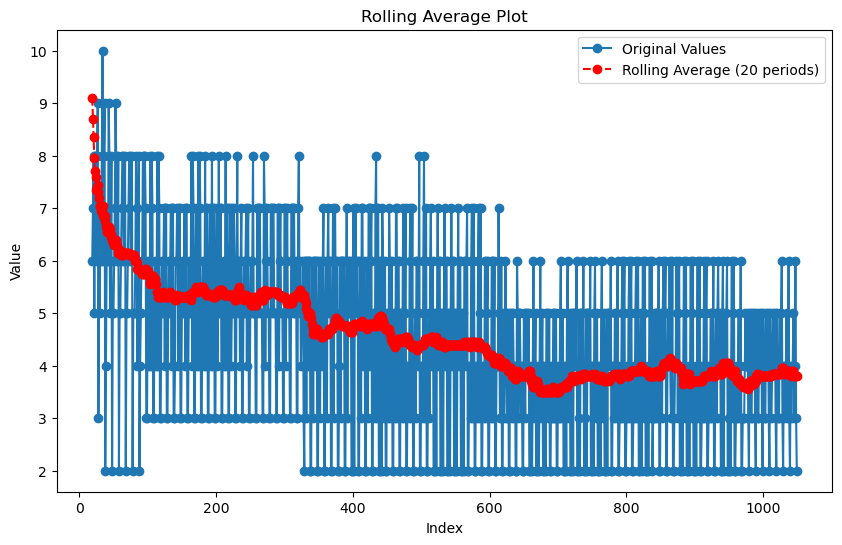

3.86
1.0584894897919392
3.78
1.100727032465361
Gibb sampling on sample index:  0 outer it:  105
it:  0  || Likelihood:  -21928.56998346249  || n_components:  5
Gibb sampling on sample index:  1 outer it:  105
it:  0  || Likelihood:  -22841.548903967046  || n_components:  3
Gibb sampling on sample index:  2 outer it:  105
it:  0  || Likelihood:  -22034.24923686909  || n_components:  4
Gibb sampling on sample index:  3 outer it:  105
it:  0  || Likelihood:  -22424.866360851072  || n_components:  5
Gibb sampling on sample index:  4 outer it:  105
it:  0  || Likelihood:  -24322.747543027905  || n_components:  5
Gibb sampling on sample index:  5 outer it:  105
it:  0  || Likelihood:  -22356.1663019897  || n_components:  3
Gibb sampling on sample index:  6 outer it:  105
it:  0  || Likelihood:  -22817.932952210944  || n_components:  3
Gibb sampling on sample index:  7 outer it:  105
it:  0  || Likelihood:  -23519.039380159495  || n_components:  5
Gibb sampling on sample index:  8 outer it:  

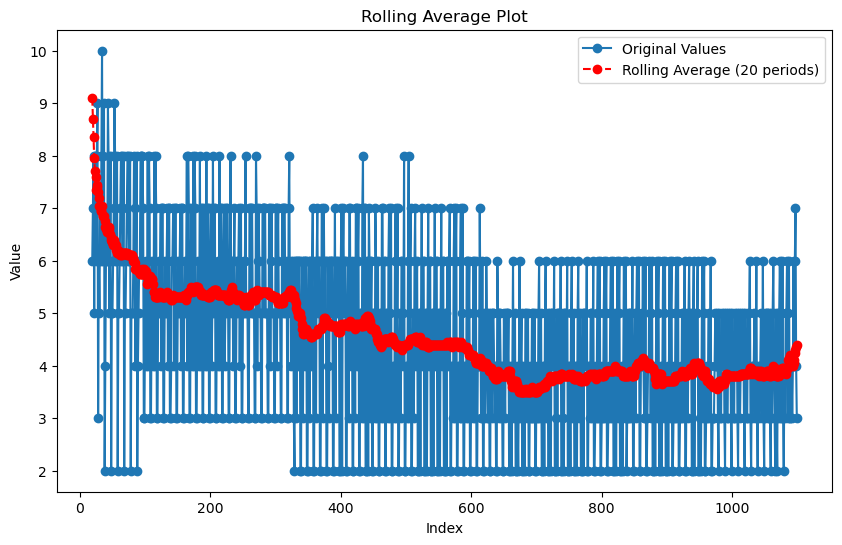

4.1
1.284523257866513
3.98
1.1830469136936204
Gibb sampling on sample index:  0 outer it:  110
it:  0  || Likelihood:  -21923.228393520916  || n_components:  4
Gibb sampling on sample index:  1 outer it:  110
it:  0  || Likelihood:  -22787.958691933658  || n_components:  4
Gibb sampling on sample index:  2 outer it:  110
it:  0  || Likelihood:  -22034.209979522893  || n_components:  4
Gibb sampling on sample index:  3 outer it:  110
it:  0  || Likelihood:  -22432.486823213847  || n_components:  4
Gibb sampling on sample index:  4 outer it:  110
it:  0  || Likelihood:  -24224.371945903727  || n_components:  5
Gibb sampling on sample index:  5 outer it:  110
it:  0  || Likelihood:  -22321.917632502893  || n_components:  4
Gibb sampling on sample index:  6 outer it:  110
it:  0  || Likelihood:  -22811.9584528022  || n_components:  5
Gibb sampling on sample index:  7 outer it:  110
it:  0  || Likelihood:  -23463.614827691148  || n_components:  7
Gibb sampling on sample index:  8 outer it: 

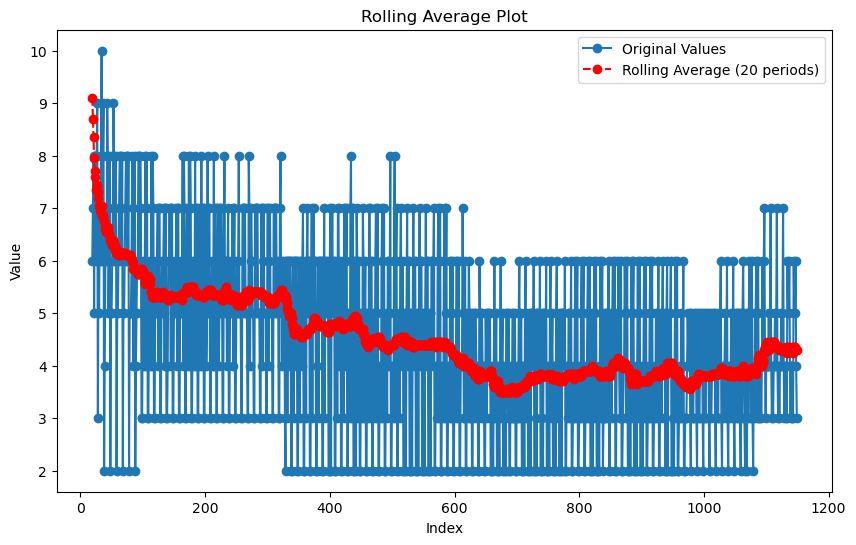

4.32
1.085172797300043
4.21
1.1941105476462386
Gibb sampling on sample index:  0 outer it:  115
it:  0  || Likelihood:  -21911.069905107553  || n_components:  4
Gibb sampling on sample index:  1 outer it:  115
it:  0  || Likelihood:  -22791.85947806263  || n_components:  4
Gibb sampling on sample index:  2 outer it:  115
it:  0  || Likelihood:  -21979.72535282212  || n_components:  4
Gibb sampling on sample index:  3 outer it:  115
it:  0  || Likelihood:  -22357.24712846356  || n_components:  5
Gibb sampling on sample index:  4 outer it:  115
it:  0  || Likelihood:  -23567.21979917885  || n_components:  6
Gibb sampling on sample index:  5 outer it:  115
it:  0  || Likelihood:  -22356.80159507324  || n_components:  5
Gibb sampling on sample index:  6 outer it:  115
it:  0  || Likelihood:  -22790.72210913603  || n_components:  6
Gibb sampling on sample index:  7 outer it:  115
it:  0  || Likelihood:  -23414.206700447627  || n_components:  7
Gibb sampling on sample index:  8 outer it:  11

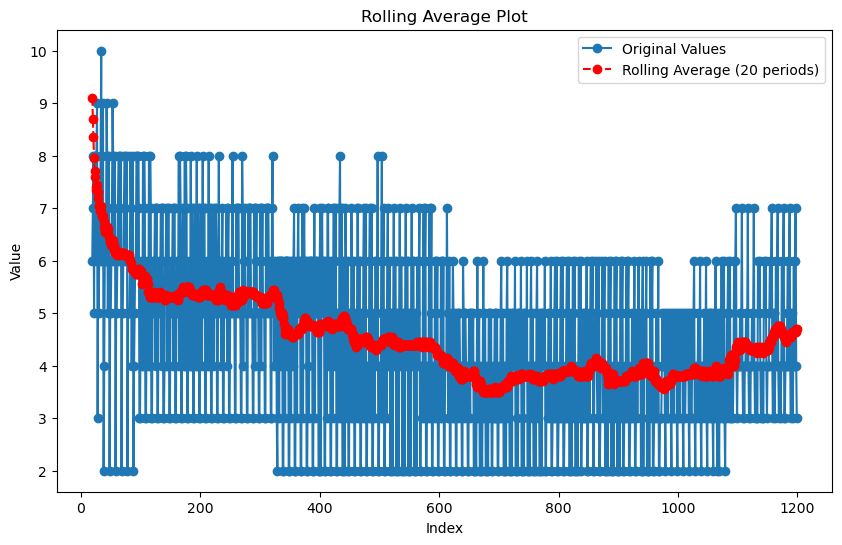

4.66
1.258729518204765
4.49
1.1873921003611234
Gibb sampling on sample index:  0 outer it:  120
it:  0  || Likelihood:  -21937.65029900602  || n_components:  4
Gibb sampling on sample index:  1 outer it:  120
it:  0  || Likelihood:  -22757.929856382456  || n_components:  4
Gibb sampling on sample index:  2 outer it:  120
it:  0  || Likelihood:  -22115.53306675411  || n_components:  3
Gibb sampling on sample index:  3 outer it:  120
it:  0  || Likelihood:  -22365.227121135675  || n_components:  4
Gibb sampling on sample index:  4 outer it:  120
it:  0  || Likelihood:  -24238.048890639424  || n_components:  6
Gibb sampling on sample index:  5 outer it:  120
it:  0  || Likelihood:  -22347.893541648336  || n_components:  4
Gibb sampling on sample index:  6 outer it:  120
it:  0  || Likelihood:  -22796.75784305221  || n_components:  6
Gibb sampling on sample index:  7 outer it:  120
it:  0  || Likelihood:  -23417.804649584836  || n_components:  7
Gibb sampling on sample index:  8 outer it: 

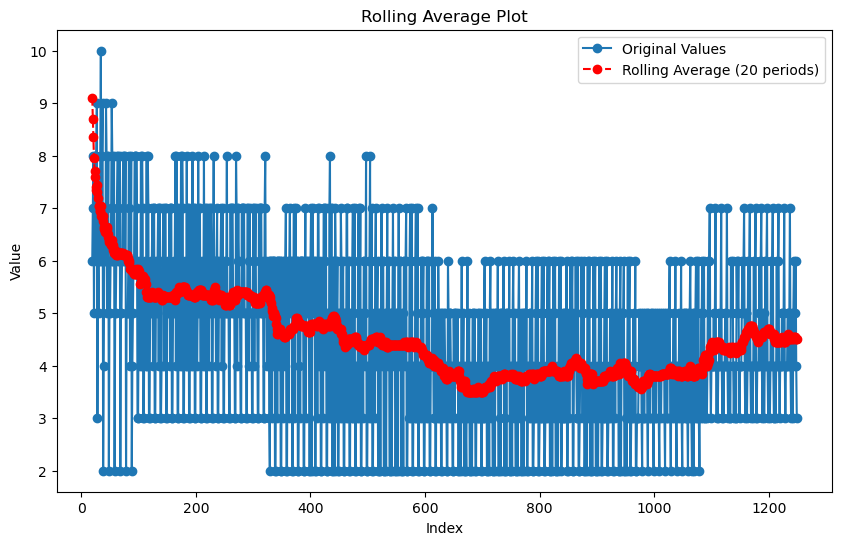

4.48
1.153082824431966
4.57
1.2104131526053408
Gibb sampling on sample index:  0 outer it:  125
it:  0  || Likelihood:  -21937.905359809647  || n_components:  6
Gibb sampling on sample index:  1 outer it:  125
it:  0  || Likelihood:  -22777.035707648884  || n_components:  5
Gibb sampling on sample index:  2 outer it:  125
it:  0  || Likelihood:  -21984.66809869424  || n_components:  4
Gibb sampling on sample index:  3 outer it:  125
it:  0  || Likelihood:  -22391.75217734442  || n_components:  6
Gibb sampling on sample index:  4 outer it:  125
it:  0  || Likelihood:  -24278.951973773506  || n_components:  6
Gibb sampling on sample index:  5 outer it:  125
it:  0  || Likelihood:  -22361.177822470032  || n_components:  5
Gibb sampling on sample index:  6 outer it:  125
it:  0  || Likelihood:  -22852.508682215204  || n_components:  4
Gibb sampling on sample index:  7 outer it:  125
it:  0  || Likelihood:  -23415.85400283315  || n_components:  6
Gibb sampling on sample index:  8 outer it: 

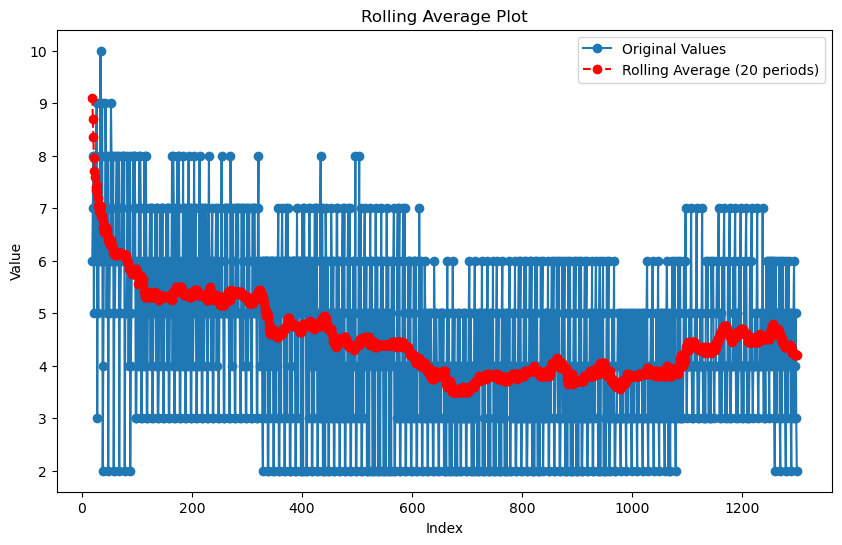

4.36
1.2924395537122808
4.42
1.2262136844775466
Gibb sampling on sample index:  0 outer it:  130
it:  0  || Likelihood:  -21952.19962405328  || n_components:  5
Gibb sampling on sample index:  1 outer it:  130
it:  0  || Likelihood:  -22745.22108166455  || n_components:  4
Gibb sampling on sample index:  2 outer it:  130
it:  0  || Likelihood:  -22119.7953123384  || n_components:  3
Gibb sampling on sample index:  3 outer it:  130
it:  0  || Likelihood:  -22352.06854929449  || n_components:  5
Gibb sampling on sample index:  4 outer it:  130
it:  0  || Likelihood:  -24212.48656610947  || n_components:  6
Gibb sampling on sample index:  5 outer it:  130
it:  0  || Likelihood:  -22337.730377766926  || n_components:  3
Gibb sampling on sample index:  6 outer it:  130
it:  0  || Likelihood:  -22811.341239125115  || n_components:  4
Gibb sampling on sample index:  7 outer it:  130
it:  0  || Likelihood:  -23424.053424467325  || n_components:  5
Gibb sampling on sample index:  8 outer it:  1

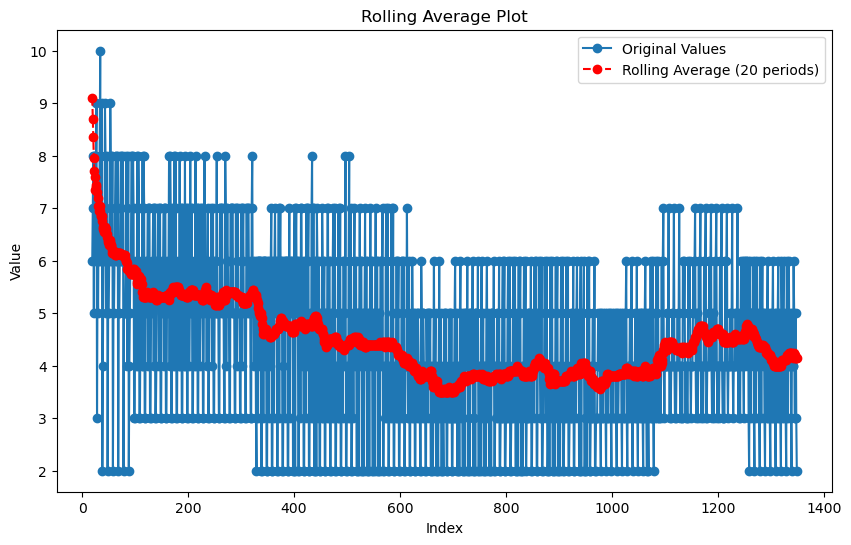

4.1
1.236931687685298
4.23
1.2716524682475163
Gibb sampling on sample index:  0 outer it:  135
it:  0  || Likelihood:  -21964.613624562655  || n_components:  5
Gibb sampling on sample index:  1 outer it:  135
it:  0  || Likelihood:  -22735.09216922902  || n_components:  4
Gibb sampling on sample index:  2 outer it:  135
it:  0  || Likelihood:  -22120.364575468328  || n_components:  4
Gibb sampling on sample index:  3 outer it:  135
it:  0  || Likelihood:  -22368.031144305005  || n_components:  6
Gibb sampling on sample index:  4 outer it:  135
it:  0  || Likelihood:  -24379.536428334646  || n_components:  5
Gibb sampling on sample index:  5 outer it:  135
it:  0  || Likelihood:  -22341.090133639063  || n_components:  3
Gibb sampling on sample index:  6 outer it:  135
it:  0  || Likelihood:  -22835.159637806573  || n_components:  3
Gibb sampling on sample index:  7 outer it:  135
it:  0  || Likelihood:  -23471.54558433752  || n_components:  5
Gibb sampling on sample index:  8 outer it: 

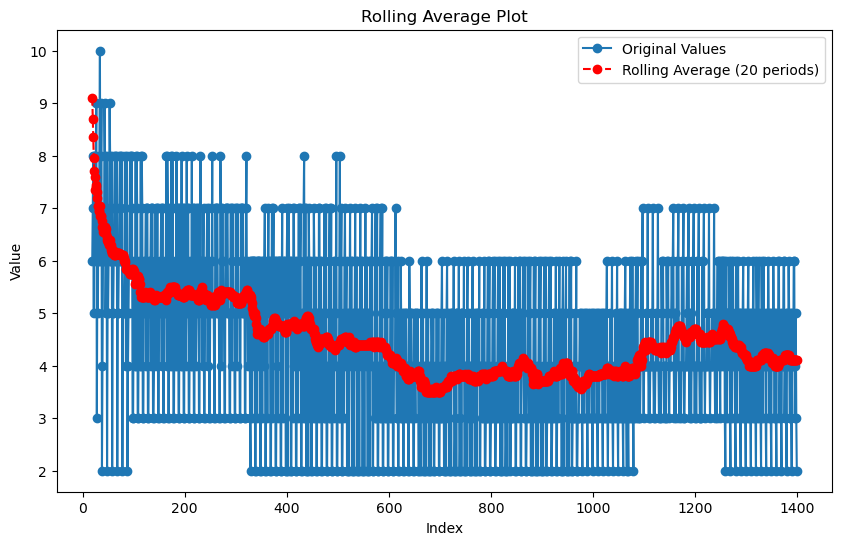

4.12
1.2270289320142376
4.11
1.2320308437697491
Gibb sampling on sample index:  0 outer it:  140
it:  0  || Likelihood:  -21944.521047175822  || n_components:  5
Gibb sampling on sample index:  1 outer it:  140
it:  0  || Likelihood:  -22747.12789681532  || n_components:  4
Gibb sampling on sample index:  2 outer it:  140
it:  0  || Likelihood:  -21990.215029152598  || n_components:  4
Gibb sampling on sample index:  3 outer it:  140
it:  0  || Likelihood:  -22336.78673034099  || n_components:  6
Gibb sampling on sample index:  4 outer it:  140
it:  0  || Likelihood:  -24138.525753631817  || n_components:  6
Gibb sampling on sample index:  5 outer it:  140
it:  0  || Likelihood:  -22332.983708604945  || n_components:  3
Gibb sampling on sample index:  6 outer it:  140
it:  0  || Likelihood:  -22775.026769874472  || n_components:  4
Gibb sampling on sample index:  7 outer it:  140
it:  0  || Likelihood:  -23173.578482820147  || n_components:  5
Gibb sampling on sample index:  8 outer it

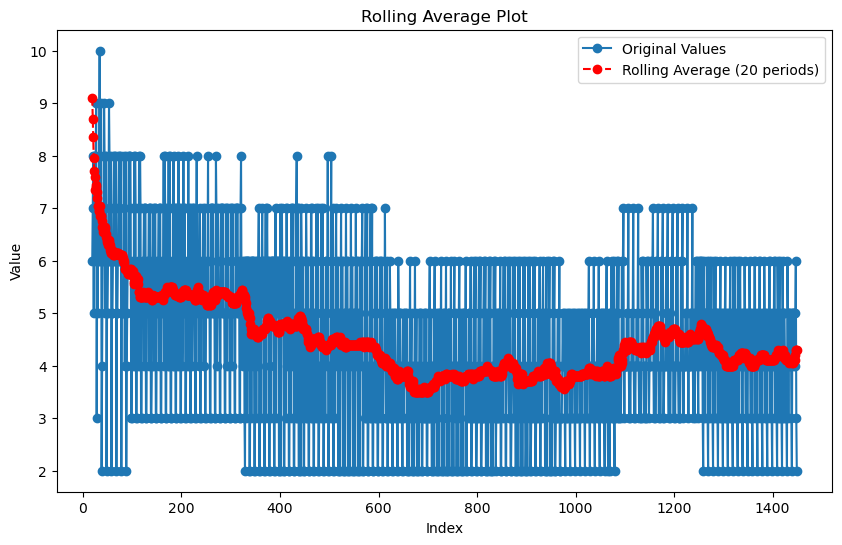

4.2
1.2165525060596438
4.16
1.2224565431948902
Gibb sampling on sample index:  0 outer it:  145
it:  0  || Likelihood:  -21920.358388983386  || n_components:  5
Gibb sampling on sample index:  1 outer it:  145
it:  0  || Likelihood:  -22730.698803832052  || n_components:  5
Gibb sampling on sample index:  2 outer it:  145
it:  0  || Likelihood:  -22118.913142621124  || n_components:  3
Gibb sampling on sample index:  3 outer it:  145
it:  0  || Likelihood:  -22338.714028487786  || n_components:  4
Gibb sampling on sample index:  4 outer it:  145
it:  0  || Likelihood:  -24204.88010644268  || n_components:  6
Gibb sampling on sample index:  5 outer it:  145
it:  0  || Likelihood:  -22358.448429964832  || n_components:  3
Gibb sampling on sample index:  6 outer it:  145
it:  0  || Likelihood:  -22807.757824574364  || n_components:  5
Gibb sampling on sample index:  7 outer it:  145
it:  0  || Likelihood:  -23449.578037023653  || n_components:  6
Gibb sampling on sample index:  8 outer it

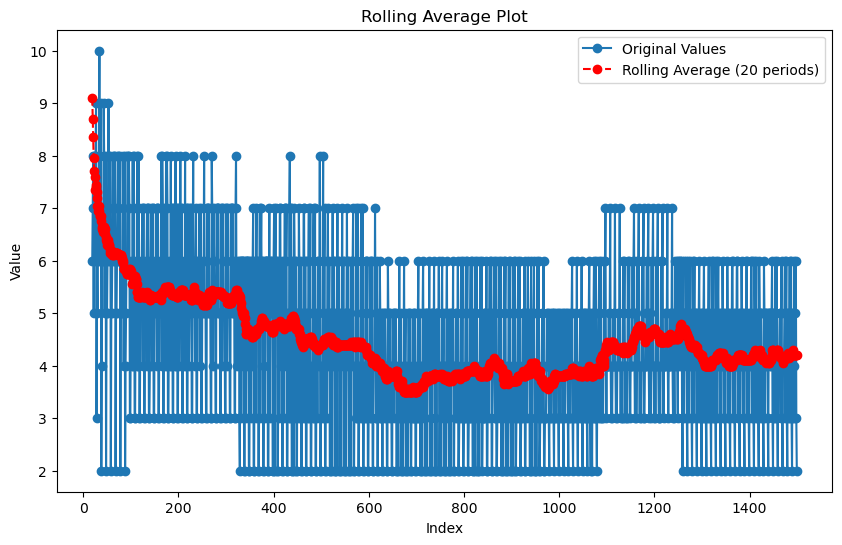

4.18
1.2757742747053649
4.19
1.2465552534885889
Gibb sampling on sample index:  0 outer it:  150
it:  0  || Likelihood:  -21923.381120576192  || n_components:  5
Gibb sampling on sample index:  1 outer it:  150
it:  0  || Likelihood:  -22749.8338798589  || n_components:  5
Gibb sampling on sample index:  2 outer it:  150
it:  0  || Likelihood:  -22016.752278236298  || n_components:  4
Gibb sampling on sample index:  3 outer it:  150
it:  0  || Likelihood:  -22370.484959847523  || n_components:  5
Gibb sampling on sample index:  4 outer it:  150
it:  0  || Likelihood:  -24177.140235527633  || n_components:  6
Gibb sampling on sample index:  5 outer it:  150
it:  0  || Likelihood:  -22352.62788198893  || n_components:  3
Gibb sampling on sample index:  6 outer it:  150
it:  0  || Likelihood:  -22832.124378239885  || n_components:  5
Gibb sampling on sample index:  7 outer it:  150
it:  0  || Likelihood:  -23447.77170630134  || n_components:  6
Gibb sampling on sample index:  8 outer it: 

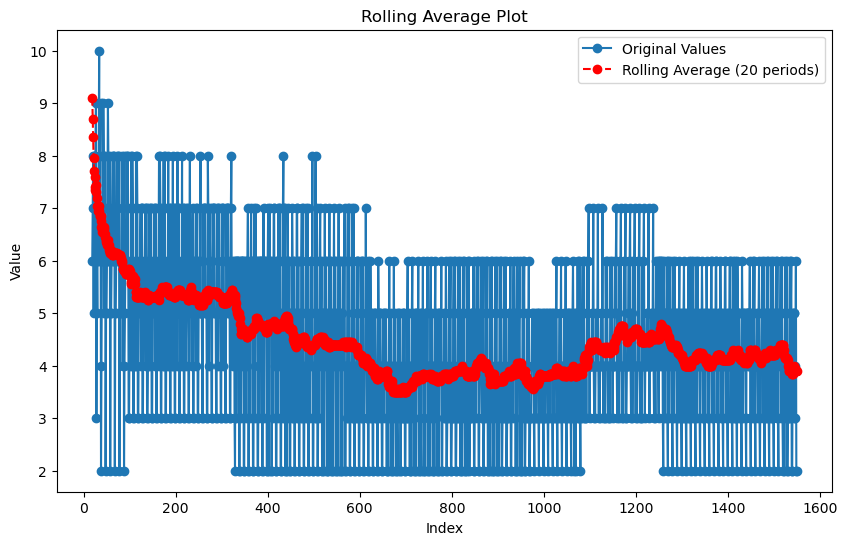

4.08
1.3833293172632466
4.13
1.3315780112332887
Gibb sampling on sample index:  0 outer it:  155
it:  0  || Likelihood:  -21922.16058039181  || n_components:  4
Gibb sampling on sample index:  1 outer it:  155
it:  0  || Likelihood:  -22828.641407181167  || n_components:  3
Gibb sampling on sample index:  2 outer it:  155
it:  0  || Likelihood:  -22117.856131890174  || n_components:  3
Gibb sampling on sample index:  3 outer it:  155
it:  0  || Likelihood:  -22437.029246846934  || n_components:  5
Gibb sampling on sample index:  4 outer it:  155
it:  0  || Likelihood:  -24175.15981610908  || n_components:  5
Gibb sampling on sample index:  5 outer it:  155
it:  0  || Likelihood:  -22348.77922600703  || n_components:  3
Gibb sampling on sample index:  6 outer it:  155
it:  0  || Likelihood:  -22834.11718305623  || n_components:  3
Gibb sampling on sample index:  7 outer it:  155
it:  0  || Likelihood:  -23483.379266143776  || n_components:  5
Gibb sampling on sample index:  8 outer it: 

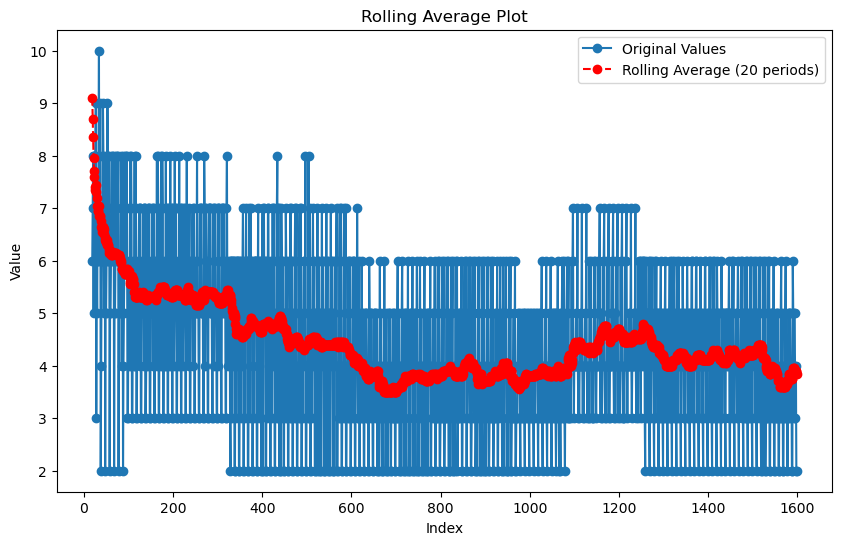

3.72
1.2006664815842907
3.9
1.3076696830622023
Gibb sampling on sample index:  0 outer it:  160
it:  0  || Likelihood:  -21925.938577658497  || n_components:  5
Gibb sampling on sample index:  1 outer it:  160
it:  0  || Likelihood:  -22832.49026710761  || n_components:  4
Gibb sampling on sample index:  2 outer it:  160
it:  0  || Likelihood:  -21971.410012323842  || n_components:  3
Gibb sampling on sample index:  3 outer it:  160
it:  0  || Likelihood:  -22443.69640855805  || n_components:  5
Gibb sampling on sample index:  4 outer it:  160
it:  0  || Likelihood:  -24224.21530369978  || n_components:  5
Gibb sampling on sample index:  5 outer it:  160
it:  0  || Likelihood:  -22360.486401317932  || n_components:  5
Gibb sampling on sample index:  6 outer it:  160
it:  0  || Likelihood:  -22833.098768091677  || n_components:  2
Gibb sampling on sample index:  7 outer it:  160
it:  0  || Likelihood:  -23555.053096209685  || n_components:  3
Gibb sampling on sample index:  8 outer it: 

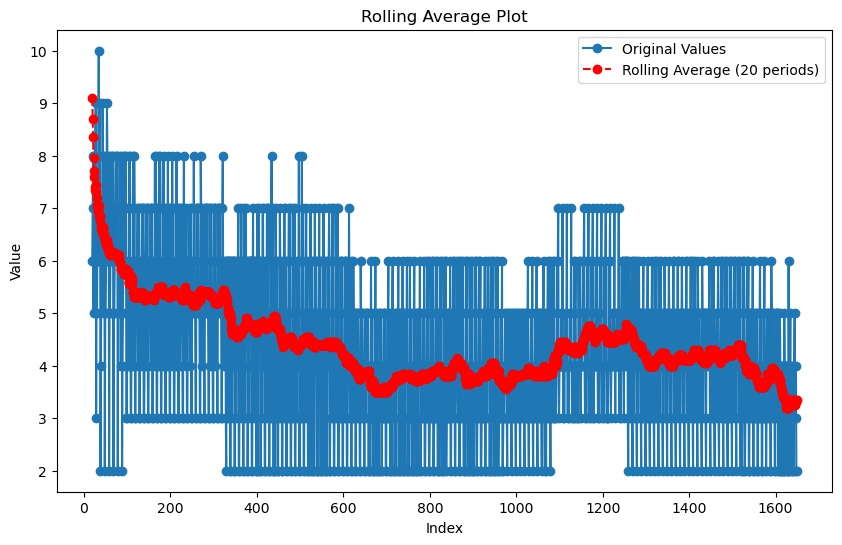

3.34
1.1594826432508596
3.53
1.195449706177554
Gibb sampling on sample index:  0 outer it:  165
it:  0  || Likelihood:  -21950.499600201652  || n_components:  4
Gibb sampling on sample index:  1 outer it:  165
it:  0  || Likelihood:  -22825.36633335001  || n_components:  3
Gibb sampling on sample index:  2 outer it:  165
it:  0  || Likelihood:  -21954.18347236804  || n_components:  3
Gibb sampling on sample index:  3 outer it:  165
it:  0  || Likelihood:  -22431.348511219207  || n_components:  5
Gibb sampling on sample index:  4 outer it:  165
it:  0  || Likelihood:  -24116.09450255412  || n_components:  5
Gibb sampling on sample index:  5 outer it:  165
it:  0  || Likelihood:  -22345.838918803143  || n_components:  3
Gibb sampling on sample index:  6 outer it:  165
it:  0  || Likelihood:  -22769.697502478393  || n_components:  3
Gibb sampling on sample index:  7 outer it:  165
it:  0  || Likelihood:  -23322.18934107046  || n_components:  4
Gibb sampling on sample index:  8 outer it:  

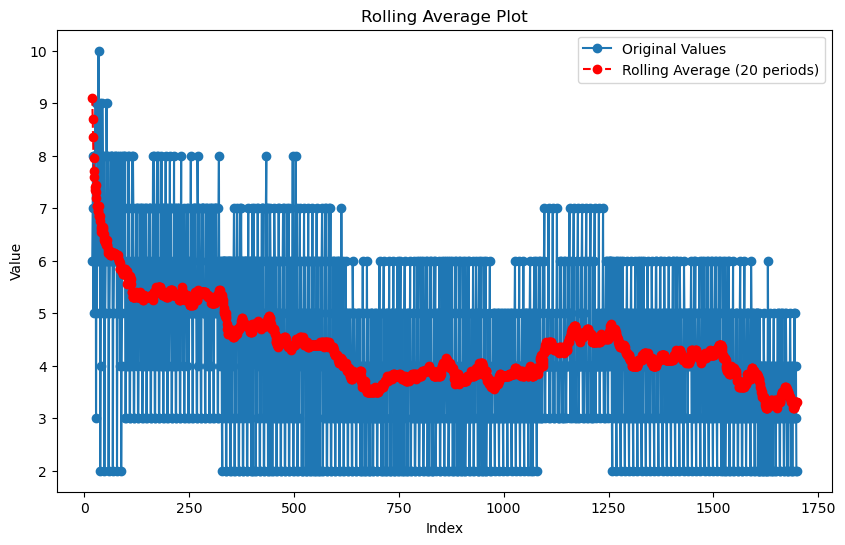

3.4
1.0583005244258363
3.37
1.1104503590886
Gibb sampling on sample index:  0 outer it:  170
it:  0  || Likelihood:  -21931.86638183374  || n_components:  4
Gibb sampling on sample index:  1 outer it:  170
it:  0  || Likelihood:  -22829.733077538196  || n_components:  4
Gibb sampling on sample index:  2 outer it:  170
it:  0  || Likelihood:  -22028.911544715756  || n_components:  3
Gibb sampling on sample index:  3 outer it:  170
it:  0  || Likelihood:  -22454.05408527705  || n_components:  5
Gibb sampling on sample index:  4 outer it:  170
it:  0  || Likelihood:  -24227.43934842652  || n_components:  4
Gibb sampling on sample index:  5 outer it:  170
it:  0  || Likelihood:  -22375.203661695785  || n_components:  4
Gibb sampling on sample index:  6 outer it:  170
it:  0  || Likelihood:  -22806.073284638398  || n_components:  3
Gibb sampling on sample index:  7 outer it:  170
it:  0  || Likelihood:  -23513.83498683591  || n_components:  5
Gibb sampling on sample index:  8 outer it:  170

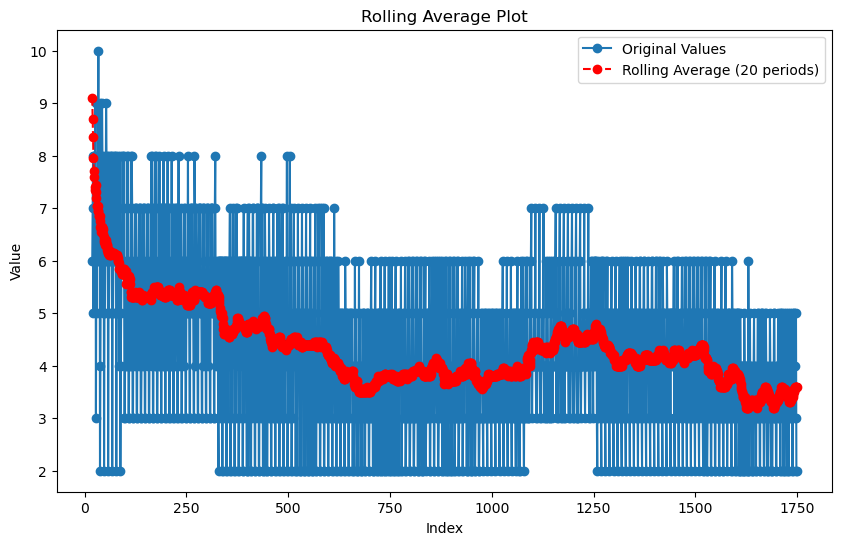

3.52
1.0998181667894016
3.46
1.0809255293497328
Gibb sampling on sample index:  0 outer it:  175
it:  0  || Likelihood:  -21923.51408444015  || n_components:  3
Gibb sampling on sample index:  1 outer it:  175
it:  0  || Likelihood:  -22825.702089821654  || n_components:  3
Gibb sampling on sample index:  2 outer it:  175
it:  0  || Likelihood:  -21968.743693463213  || n_components:  3
Gibb sampling on sample index:  3 outer it:  175
it:  0  || Likelihood:  -22430.515984120535  || n_components:  4
Gibb sampling on sample index:  4 outer it:  175
it:  0  || Likelihood:  -24207.82072043729  || n_components:  4
Gibb sampling on sample index:  5 outer it:  175
it:  0  || Likelihood:  -22358.54882278258  || n_components:  3
Gibb sampling on sample index:  6 outer it:  175
it:  0  || Likelihood:  -22795.754226384277  || n_components:  3
Gibb sampling on sample index:  7 outer it:  175
it:  0  || Likelihood:  -23387.786668414486  || n_components:  5
Gibb sampling on sample index:  8 outer it:

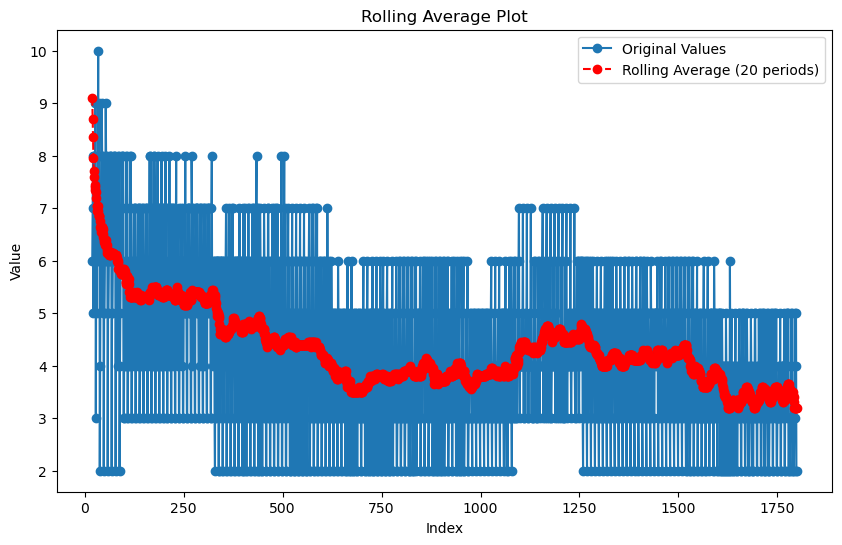

3.38
1.037111372997134
3.45
1.0712142642814275
Gibb sampling on sample index:  0 outer it:  180
it:  0  || Likelihood:  -21920.694406094957  || n_components:  3
Gibb sampling on sample index:  1 outer it:  180
it:  0  || Likelihood:  -22857.63754110366  || n_components:  3
Gibb sampling on sample index:  2 outer it:  180
it:  0  || Likelihood:  -22118.6652123381  || n_components:  2
Gibb sampling on sample index:  3 outer it:  180
it:  0  || Likelihood:  -22423.8093221733  || n_components:  3
Gibb sampling on sample index:  4 outer it:  180
it:  0  || Likelihood:  -24217.26554584525  || n_components:  5
Gibb sampling on sample index:  5 outer it:  180
it:  0  || Likelihood:  -22325.08611344283  || n_components:  3
Gibb sampling on sample index:  6 outer it:  180
it:  0  || Likelihood:  -22828.682864292634  || n_components:  4
Gibb sampling on sample index:  7 outer it:  180
it:  0  || Likelihood:  -23518.577316172687  || n_components:  5
Gibb sampling on sample index:  8 outer it:  180

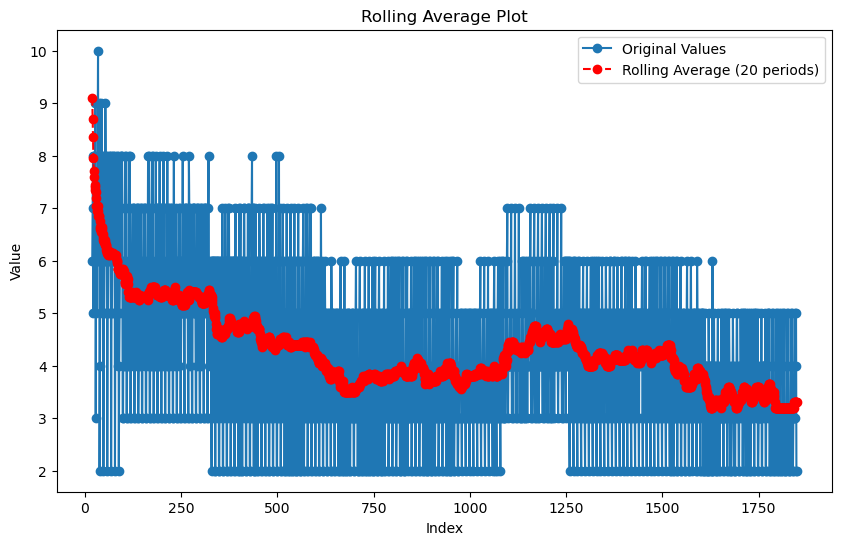

3.24
1.0688311372709909
3.31
1.0554146104730595
Gibb sampling on sample index:  0 outer it:  185
it:  0  || Likelihood:  -21915.807185495534  || n_components:  4
Gibb sampling on sample index:  1 outer it:  185
it:  0  || Likelihood:  -22745.273989121346  || n_components:  5
Gibb sampling on sample index:  2 outer it:  185
it:  0  || Likelihood:  -22116.722709276066  || n_components:  2
Gibb sampling on sample index:  3 outer it:  185
it:  0  || Likelihood:  -22354.032509754423  || n_components:  4
Gibb sampling on sample index:  4 outer it:  185
it:  0  || Likelihood:  -23912.317705272602  || n_components:  5
Gibb sampling on sample index:  5 outer it:  185
it:  0  || Likelihood:  -22345.334913139584  || n_components:  4
Gibb sampling on sample index:  6 outer it:  185
it:  0  || Likelihood:  -22839.999459205803  || n_components:  4
Gibb sampling on sample index:  7 outer it:  185
it:  0  || Likelihood:  -23403.070826568524  || n_components:  5
Gibb sampling on sample index:  8 outer 

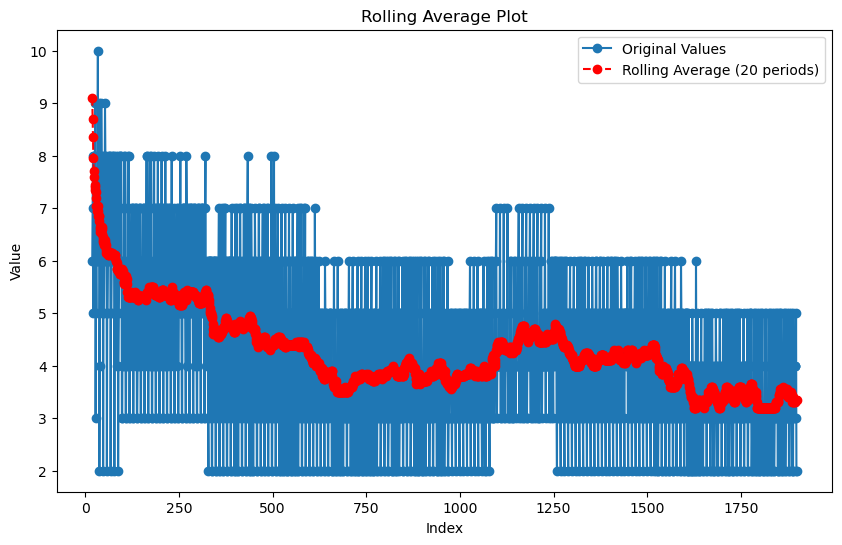

3.44
1.0799999999999998
3.34
1.0790736768172968
Gibb sampling on sample index:  0 outer it:  190
it:  0  || Likelihood:  -21911.282031311668  || n_components:  5
Gibb sampling on sample index:  1 outer it:  190
it:  0  || Likelihood:  -22826.537955109205  || n_components:  4
Gibb sampling on sample index:  2 outer it:  190
it:  0  || Likelihood:  -22140.766106334453  || n_components:  2
Gibb sampling on sample index:  3 outer it:  190
it:  0  || Likelihood:  -22458.538031148764  || n_components:  4
Gibb sampling on sample index:  4 outer it:  190
it:  0  || Likelihood:  -24398.612850971374  || n_components:  4
Gibb sampling on sample index:  5 outer it:  190
it:  0  || Likelihood:  -22349.382441845733  || n_components:  4
Gibb sampling on sample index:  6 outer it:  190
it:  0  || Likelihood:  -22850.01153963404  || n_components:  3
Gibb sampling on sample index:  7 outer it:  190
it:  0  || Likelihood:  -23483.804823408318  || n_components:  4
Gibb sampling on sample index:  8 outer i

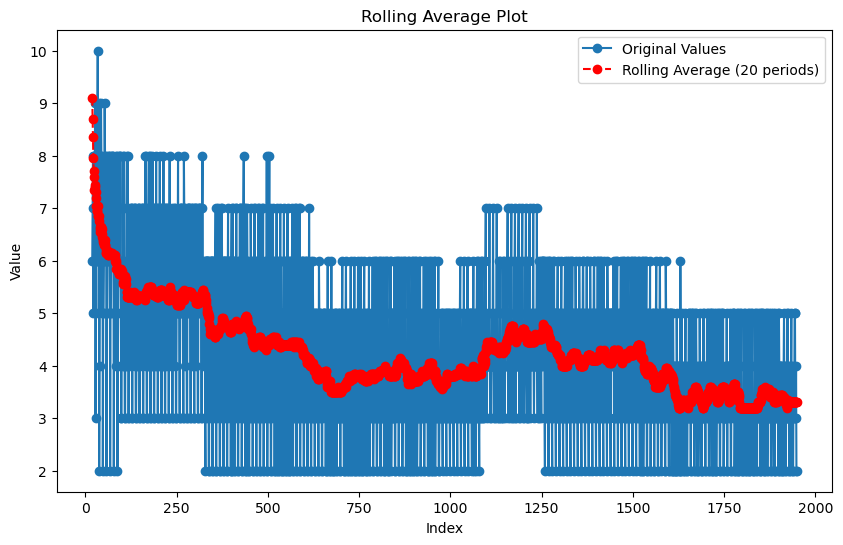

3.32
1.0087616170334792
3.38
1.046709128650362
Gibb sampling on sample index:  0 outer it:  195
it:  0  || Likelihood:  -21936.344321713736  || n_components:  4
Gibb sampling on sample index:  1 outer it:  195
it:  0  || Likelihood:  -22820.985051811338  || n_components:  3
Gibb sampling on sample index:  2 outer it:  195
it:  0  || Likelihood:  -21989.42750179218  || n_components:  3
Gibb sampling on sample index:  3 outer it:  195
it:  0  || Likelihood:  -22415.63867648799  || n_components:  5
Gibb sampling on sample index:  4 outer it:  195
it:  0  || Likelihood:  -24100.892452816464  || n_components:  5
Gibb sampling on sample index:  5 outer it:  195
it:  0  || Likelihood:  -22349.900637133025  || n_components:  4
Gibb sampling on sample index:  6 outer it:  195
it:  0  || Likelihood:  -22808.992027273067  || n_components:  3
Gibb sampling on sample index:  7 outer it:  195
it:  0  || Likelihood:  -23548.19371975241  || n_components:  4
Gibb sampling on sample index:  8 outer it: 

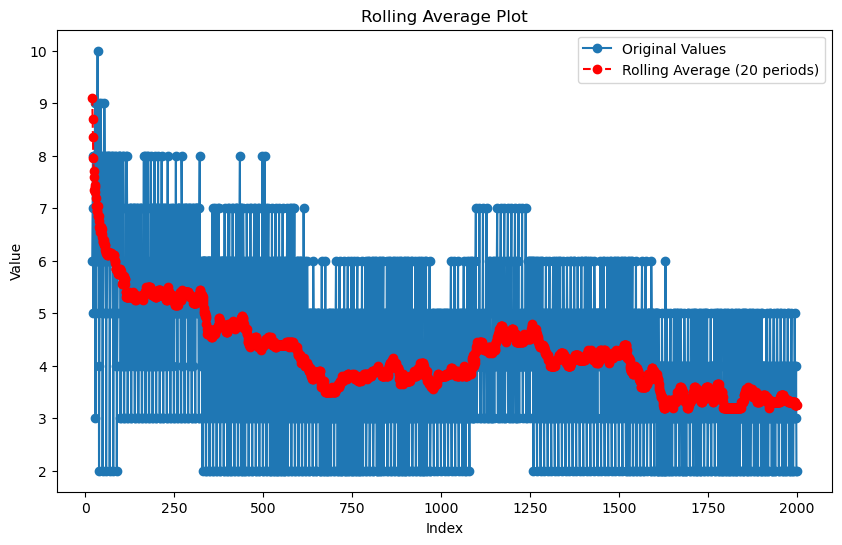

3.32
0.988736567544662
3.32
0.9987992791347019
Gibb sampling on sample index:  0 outer it:  200
it:  0  || Likelihood:  -21922.737233057636  || n_components:  5
Gibb sampling on sample index:  1 outer it:  200
it:  0  || Likelihood:  -22852.47212417952  || n_components:  4
Gibb sampling on sample index:  2 outer it:  200
it:  0  || Likelihood:  -22115.753874603415  || n_components:  2
Gibb sampling on sample index:  3 outer it:  200
it:  0  || Likelihood:  -22442.404208455886  || n_components:  4
Gibb sampling on sample index:  4 outer it:  200
it:  0  || Likelihood:  -24381.7941600666  || n_components:  5
Gibb sampling on sample index:  5 outer it:  200
it:  0  || Likelihood:  -22329.873977081916  || n_components:  3
Gibb sampling on sample index:  6 outer it:  200
it:  0  || Likelihood:  -22821.91230305149  || n_components:  3
Gibb sampling on sample index:  7 outer it:  200
it:  0  || Likelihood:  -23529.9044212205  || n_components:  4
Gibb sampling on sample index:  8 outer it:  20

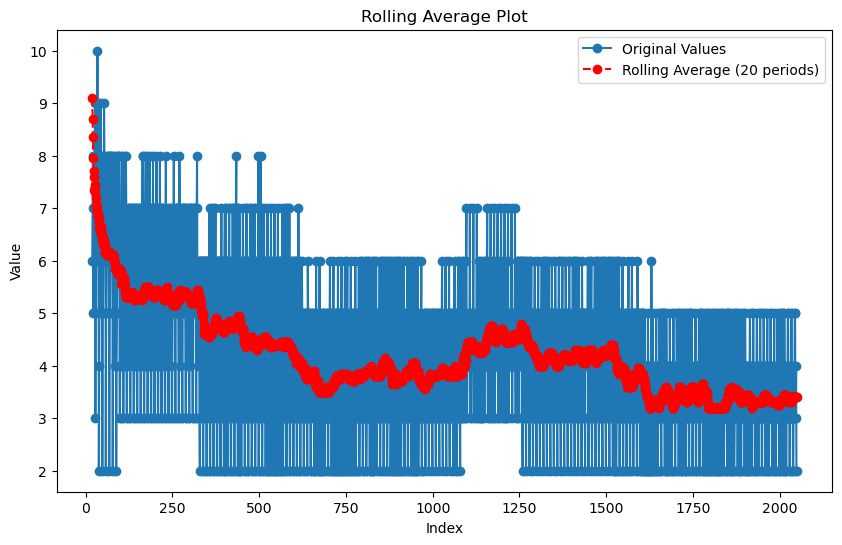

3.4
1.0583005244258363
3.36
1.0248902380255165
Gibb sampling on sample index:  0 outer it:  205
it:  0  || Likelihood:  -21907.020390253365  || n_components:  4
Gibb sampling on sample index:  1 outer it:  205
it:  0  || Likelihood:  -22855.702616393533  || n_components:  3
Gibb sampling on sample index:  2 outer it:  205
it:  0  || Likelihood:  -21981.30432216052  || n_components:  3
Gibb sampling on sample index:  3 outer it:  205
it:  0  || Likelihood:  -22415.49089288617  || n_components:  5
Gibb sampling on sample index:  4 outer it:  205
it:  0  || Likelihood:  -24205.842341774307  || n_components:  5
Gibb sampling on sample index:  5 outer it:  205
it:  0  || Likelihood:  -22330.24904200272  || n_components:  3
Gibb sampling on sample index:  6 outer it:  205
it:  0  || Likelihood:  -22833.736689550093  || n_components:  3
Gibb sampling on sample index:  7 outer it:  205
it:  0  || Likelihood:  -23471.54268068823  || n_components:  4
Gibb sampling on sample index:  8 outer it:  

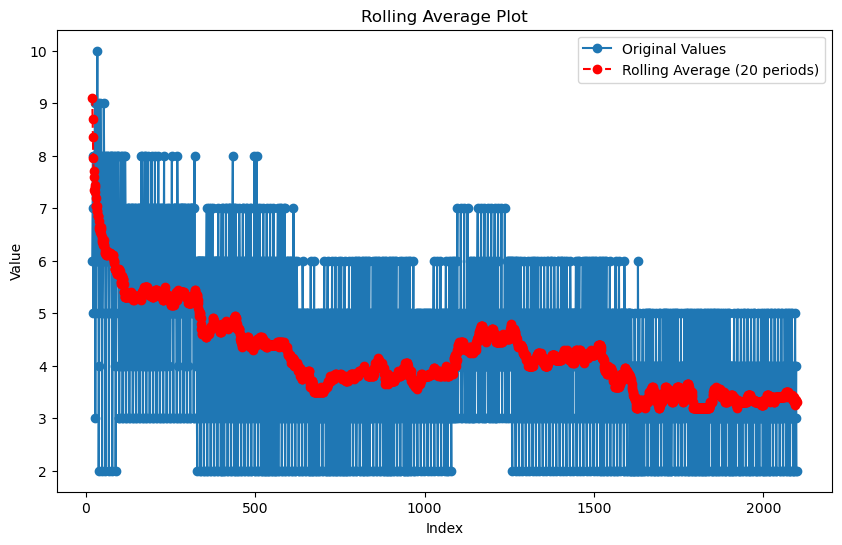

3.38
1.037111372997134
3.39
1.047807234180028
Gibb sampling on sample index:  0 outer it:  210
it:  0  || Likelihood:  -21936.628364931305  || n_components:  4
Gibb sampling on sample index:  1 outer it:  210
it:  0  || Likelihood:  -22842.955382630258  || n_components:  4
Gibb sampling on sample index:  2 outer it:  210
it:  0  || Likelihood:  -22110.569867134527  || n_components:  2
Gibb sampling on sample index:  3 outer it:  210
it:  0  || Likelihood:  -22351.24010752242  || n_components:  4
Gibb sampling on sample index:  4 outer it:  210
it:  0  || Likelihood:  -24321.210972289442  || n_components:  5
Gibb sampling on sample index:  5 outer it:  210
it:  0  || Likelihood:  -22342.787620223986  || n_components:  3
Gibb sampling on sample index:  6 outer it:  210
it:  0  || Likelihood:  -22817.521541310143  || n_components:  4
Gibb sampling on sample index:  7 outer it:  210
it:  0  || Likelihood:  -23427.566893039446  || n_components:  5
Gibb sampling on sample index:  8 outer it:

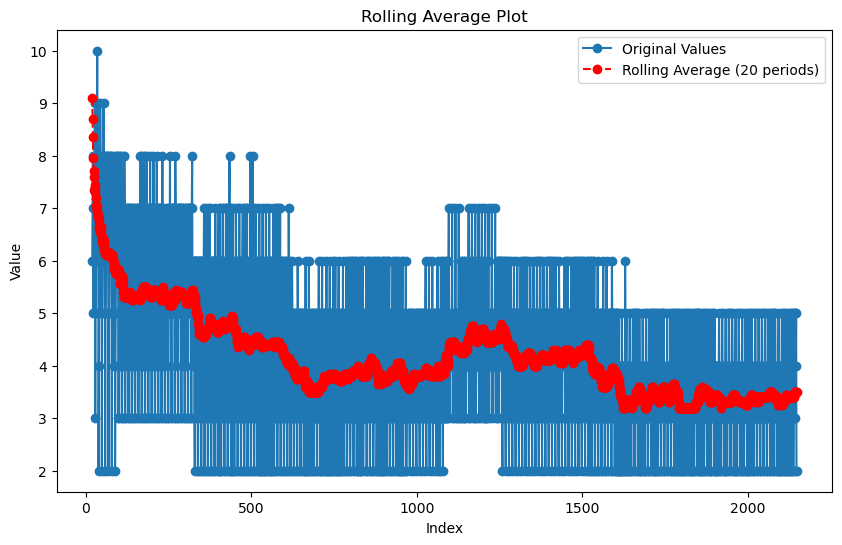

3.46
1.1173182178770735
3.42
1.078702924812944
Gibb sampling on sample index:  0 outer it:  215
it:  0  || Likelihood:  -21936.135211288347  || n_components:  3
Gibb sampling on sample index:  1 outer it:  215
it:  0  || Likelihood:  -22740.984115746804  || n_components:  4
Gibb sampling on sample index:  2 outer it:  215
it:  0  || Likelihood:  -21965.234057489222  || n_components:  3
Gibb sampling on sample index:  3 outer it:  215
it:  0  || Likelihood:  -22421.60113123329  || n_components:  5
Gibb sampling on sample index:  4 outer it:  215
it:  0  || Likelihood:  -24267.503373615287  || n_components:  5
Gibb sampling on sample index:  5 outer it:  215
it:  0  || Likelihood:  -22334.11193493957  || n_components:  3
Gibb sampling on sample index:  6 outer it:  215
it:  0  || Likelihood:  -22837.38519503777  || n_components:  4
Gibb sampling on sample index:  7 outer it:  215
it:  0  || Likelihood:  -23448.787616795526  || n_components:  5
Gibb sampling on sample index:  8 outer it: 

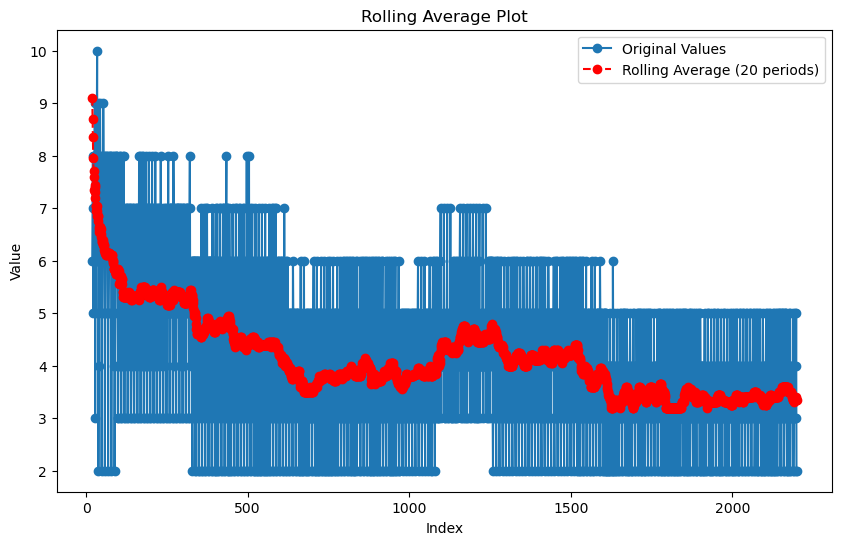

3.46
1.06226173799116
3.46
1.0901376059929315
Gibb sampling on sample index:  0 outer it:  220
it:  0  || Likelihood:  -21947.40518319737  || n_components:  4
Gibb sampling on sample index:  1 outer it:  220
it:  0  || Likelihood:  -22840.9768907718  || n_components:  3
Gibb sampling on sample index:  2 outer it:  220
it:  0  || Likelihood:  -22128.425111188477  || n_components:  2
Gibb sampling on sample index:  3 outer it:  220
it:  0  || Likelihood:  -22462.742600841193  || n_components:  4
Gibb sampling on sample index:  4 outer it:  220
it:  0  || Likelihood:  -24262.804705558534  || n_components:  5
Gibb sampling on sample index:  5 outer it:  220
it:  0  || Likelihood:  -22344.616568495803  || n_components:  3
Gibb sampling on sample index:  6 outer it:  220
it:  0  || Likelihood:  -22809.450617184822  || n_components:  3
Gibb sampling on sample index:  7 outer it:  220
it:  0  || Likelihood:  -23522.33334600944  || n_components:  4
Gibb sampling on sample index:  8 outer it:  2

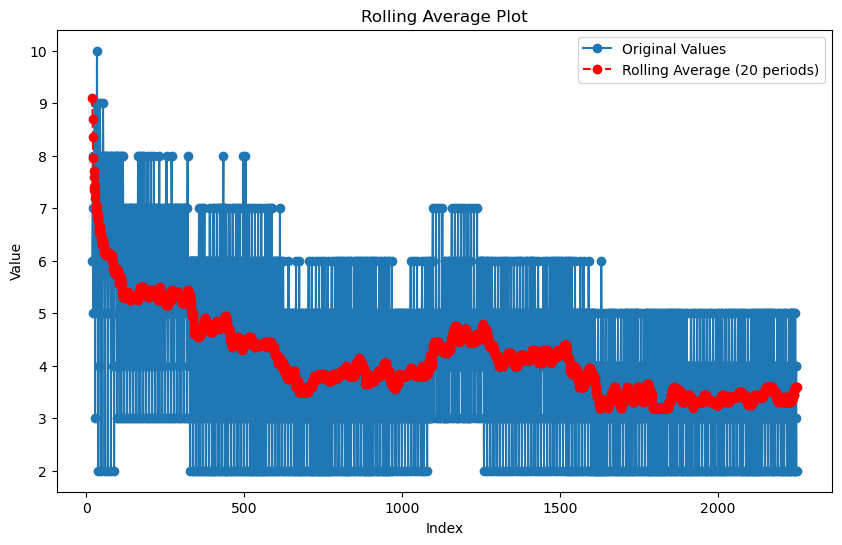

3.4
1.0954451150103324
3.43
1.0793979803575695
Gibb sampling on sample index:  0 outer it:  225
it:  0  || Likelihood:  -21935.137537910916  || n_components:  4
Gibb sampling on sample index:  1 outer it:  225
it:  0  || Likelihood:  -22778.729273304067  || n_components:  5
Gibb sampling on sample index:  2 outer it:  225
it:  0  || Likelihood:  -22122.558194416357  || n_components:  2
Gibb sampling on sample index:  3 outer it:  225
it:  0  || Likelihood:  -22361.769662818213  || n_components:  4
Gibb sampling on sample index:  4 outer it:  225
it:  0  || Likelihood:  -24349.285383840914  || n_components:  4
Gibb sampling on sample index:  5 outer it:  225
it:  0  || Likelihood:  -22351.29339241924  || n_components:  4
Gibb sampling on sample index:  6 outer it:  225
it:  0  || Likelihood:  -22832.83827479836  || n_components:  4
Gibb sampling on sample index:  7 outer it:  225
it:  0  || Likelihood:  -23515.68479732324  || n_components:  5
Gibb sampling on sample index:  8 outer it: 

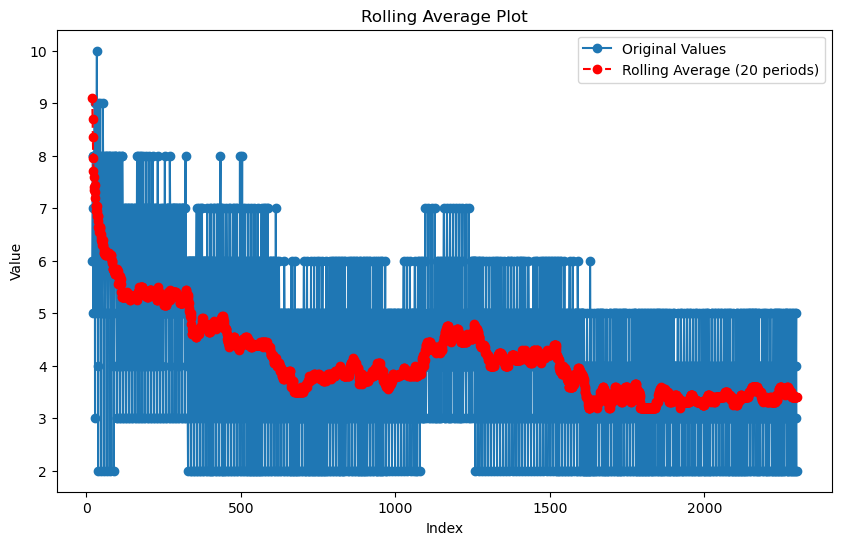

3.48
1.1178550889985697
3.44
1.1074294559925701
Gibb sampling on sample index:  0 outer it:  230
it:  0  || Likelihood:  -21931.00567752183  || n_components:  3
Gibb sampling on sample index:  1 outer it:  230
it:  0  || Likelihood:  -22749.054283054265  || n_components:  4
Gibb sampling on sample index:  2 outer it:  230
it:  0  || Likelihood:  -22110.597057027506  || n_components:  2
Gibb sampling on sample index:  3 outer it:  230
it:  0  || Likelihood:  -22389.334165442186  || n_components:  4
Gibb sampling on sample index:  4 outer it:  230
it:  0  || Likelihood:  -24236.465462276927  || n_components:  5
Gibb sampling on sample index:  5 outer it:  230
it:  0  || Likelihood:  -22340.171388495368  || n_components:  3
Gibb sampling on sample index:  6 outer it:  230
it:  0  || Likelihood:  -22848.917709887744  || n_components:  4
Gibb sampling on sample index:  7 outer it:  230
it:  0  || Likelihood:  -23454.551495022974  || n_components:  5
Gibb sampling on sample index:  8 outer i

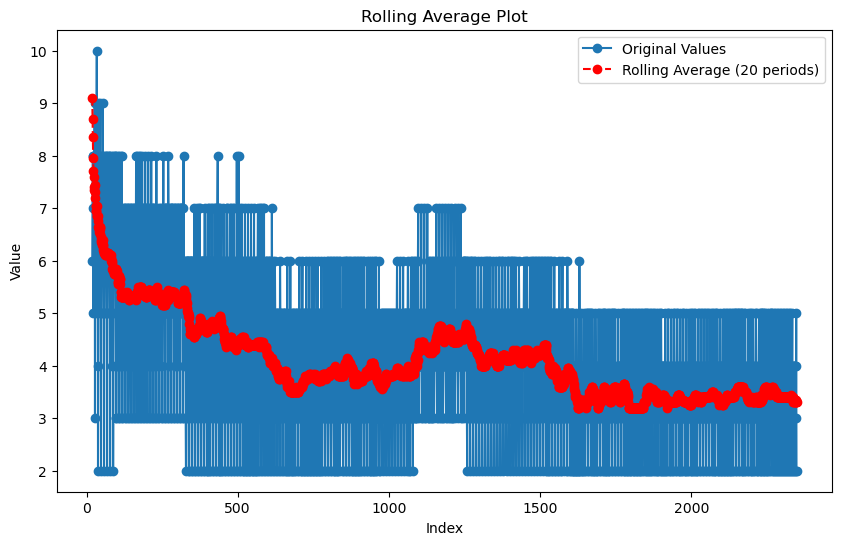

3.36
1.0725670142233539
3.42
1.0970870521521983
Gibb sampling on sample index:  0 outer it:  235
it:  0  || Likelihood:  -21913.256061678174  || n_components:  3
Gibb sampling on sample index:  1 outer it:  235
it:  0  || Likelihood:  -22844.435784747508  || n_components:  4
Gibb sampling on sample index:  2 outer it:  235
it:  0  || Likelihood:  -22138.726255273326  || n_components:  2
Gibb sampling on sample index:  3 outer it:  235
it:  0  || Likelihood:  -22437.951362950986  || n_components:  4
Gibb sampling on sample index:  4 outer it:  235
it:  0  || Likelihood:  -24327.56448571904  || n_components:  4
Gibb sampling on sample index:  5 outer it:  235
it:  0  || Likelihood:  -22316.35788944096  || n_components:  4
Gibb sampling on sample index:  6 outer it:  235
it:  0  || Likelihood:  -22813.203379279952  || n_components:  3
Gibb sampling on sample index:  7 outer it:  235
it:  0  || Likelihood:  -23502.2000971233  || n_components:  5
Gibb sampling on sample index:  8 outer it: 

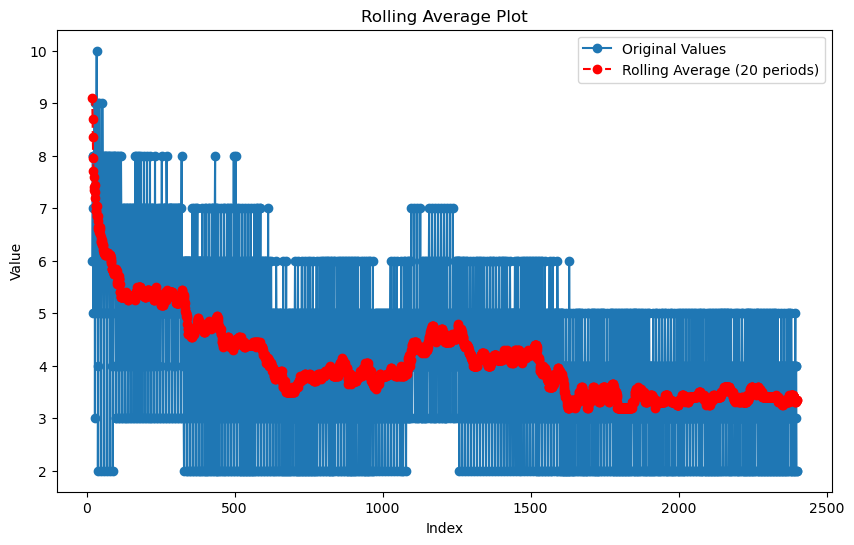

3.34
1.0121264743103997
3.35
1.0428326807307104
Gibb sampling on sample index:  0 outer it:  240
it:  0  || Likelihood:  -21943.9060036225  || n_components:  4
Gibb sampling on sample index:  1 outer it:  240
it:  0  || Likelihood:  -22831.12221594764  || n_components:  3
Gibb sampling on sample index:  2 outer it:  240
it:  0  || Likelihood:  -22119.212704785594  || n_components:  2
Gibb sampling on sample index:  3 outer it:  240
it:  0  || Likelihood:  -22439.363757735446  || n_components:  4
Gibb sampling on sample index:  4 outer it:  240
it:  0  || Likelihood:  -24310.22806774285  || n_components:  5
Gibb sampling on sample index:  5 outer it:  240
it:  0  || Likelihood:  -22318.084881145838  || n_components:  3
Gibb sampling on sample index:  6 outer it:  240
it:  0  || Likelihood:  -22810.4848994373  || n_components:  4
Gibb sampling on sample index:  7 outer it:  240
it:  0  || Likelihood:  -23544.44343259292  || n_components:  4
Gibb sampling on sample index:  8 outer it:  24

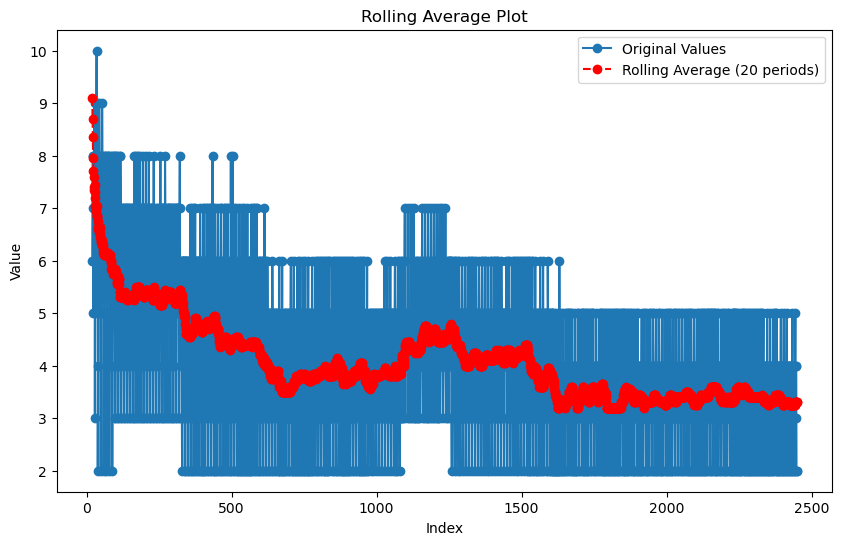

3.28
0.980612053770501
3.31
0.9969453345093703
Gibb sampling on sample index:  0 outer it:  245
it:  0  || Likelihood:  -21954.344090317853  || n_components:  4
Gibb sampling on sample index:  1 outer it:  245
it:  0  || Likelihood:  -22848.80878704479  || n_components:  3
Gibb sampling on sample index:  2 outer it:  245
it:  0  || Likelihood:  -22118.9759196067  || n_components:  2
Gibb sampling on sample index:  3 outer it:  245
it:  0  || Likelihood:  -22435.900578866407  || n_components:  4
Gibb sampling on sample index:  4 outer it:  245
it:  0  || Likelihood:  -24316.601350945573  || n_components:  5
Gibb sampling on sample index:  5 outer it:  245
it:  0  || Likelihood:  -22325.790957062192  || n_components:  3
Gibb sampling on sample index:  6 outer it:  245
it:  0  || Likelihood:  -22821.948238007295  || n_components:  5
Gibb sampling on sample index:  7 outer it:  245
it:  0  || Likelihood:  -23460.403901719015  || n_components:  5
Gibb sampling on sample index:  8 outer it: 

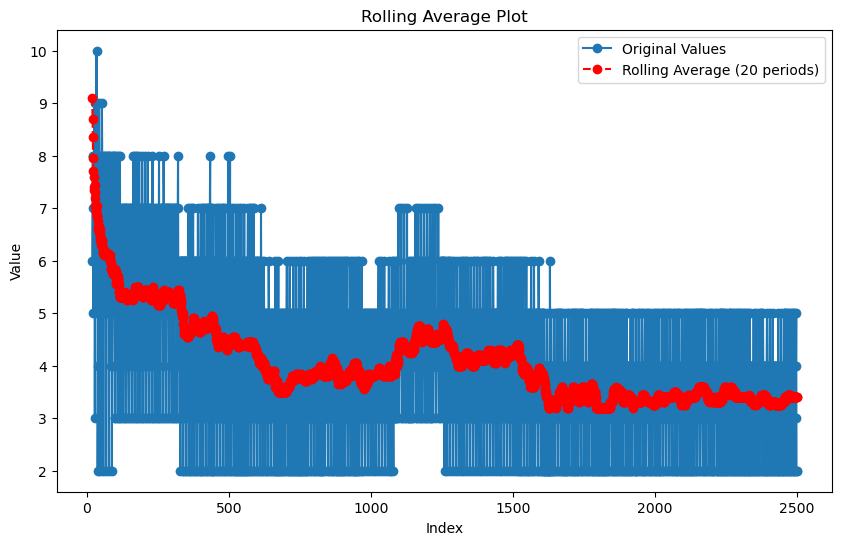

3.42
1.1329607230614838
3.35
1.061838029079765
Gibb sampling on sample index:  0 outer it:  250
it:  0  || Likelihood:  -21933.982911974348  || n_components:  3
Gibb sampling on sample index:  1 outer it:  250
it:  0  || Likelihood:  -22753.73986811723  || n_components:  4
Gibb sampling on sample index:  2 outer it:  250
it:  0  || Likelihood:  -22113.57286002653  || n_components:  2
Gibb sampling on sample index:  3 outer it:  250
it:  0  || Likelihood:  -22422.32927123386  || n_components:  4
Gibb sampling on sample index:  4 outer it:  250
it:  0  || Likelihood:  -24316.5358443294  || n_components:  5
Gibb sampling on sample index:  5 outer it:  250
it:  0  || Likelihood:  -22350.966381734106  || n_components:  3
Gibb sampling on sample index:  6 outer it:  250
it:  0  || Likelihood:  -22823.474855293374  || n_components:  4
Gibb sampling on sample index:  7 outer it:  250
it:  0  || Likelihood:  -23494.66172930555  || n_components:  5
Gibb sampling on sample index:  8 outer it:  25

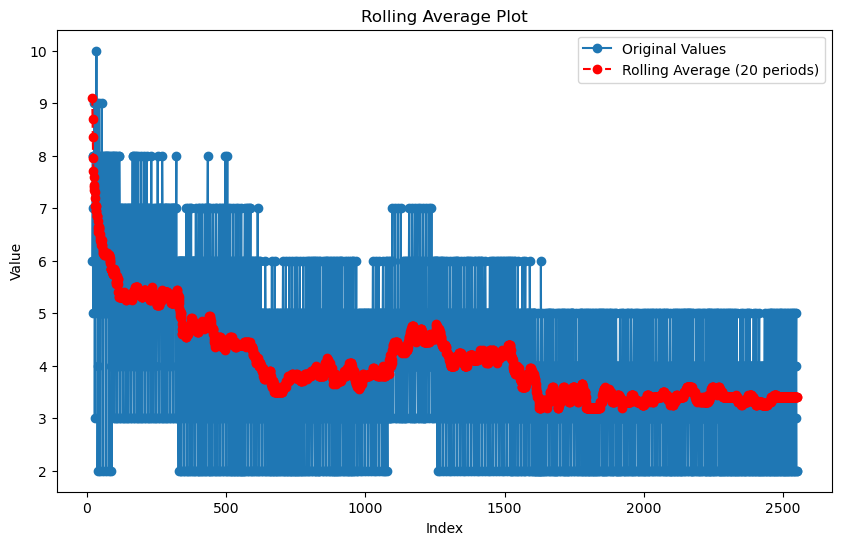

3.4
1.1135528725660044
3.41
1.1233432244866215
Gibb sampling on sample index:  0 outer it:  255
it:  0  || Likelihood:  -21924.38893421555  || n_components:  3
Gibb sampling on sample index:  1 outer it:  255
it:  0  || Likelihood:  -22752.156701836648  || n_components:  4
Gibb sampling on sample index:  2 outer it:  255
it:  0  || Likelihood:  -22115.47141524182  || n_components:  2
Gibb sampling on sample index:  3 outer it:  255
it:  0  || Likelihood:  -22368.104880885166  || n_components:  4
Gibb sampling on sample index:  4 outer it:  255
it:  0  || Likelihood:  -24323.86235096673  || n_components:  5
Gibb sampling on sample index:  5 outer it:  255
it:  0  || Likelihood:  -22339.260173311905  || n_components:  3
Gibb sampling on sample index:  6 outer it:  255
it:  0  || Likelihood:  -22834.728346433327  || n_components:  4
Gibb sampling on sample index:  7 outer it:  255
it:  0  || Likelihood:  -23447.04839323514  || n_components:  5
Gibb sampling on sample index:  8 outer it:  

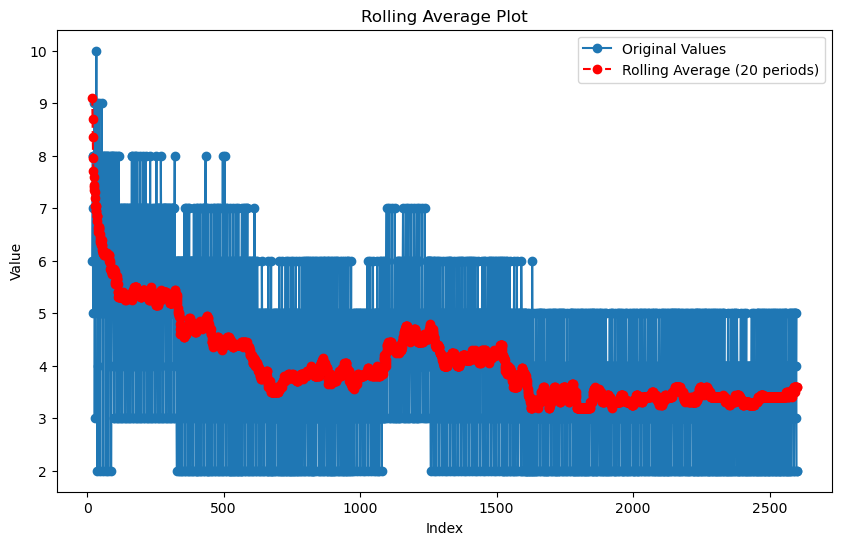

3.52
1.1178550889985697
3.46
1.1173182178770737
Gibb sampling on sample index:  0 outer it:  260
it:  0  || Likelihood:  -21942.91261110982  || n_components:  3
Gibb sampling on sample index:  1 outer it:  260
it:  0  || Likelihood:  -22724.37507803509  || n_components:  4
Gibb sampling on sample index:  2 outer it:  260
it:  0  || Likelihood:  -22105.954818657312  || n_components:  2
Gibb sampling on sample index:  3 outer it:  260
it:  0  || Likelihood:  -22377.683594960075  || n_components:  4
Gibb sampling on sample index:  4 outer it:  260
it:  0  || Likelihood:  -24265.49323411734  || n_components:  5
Gibb sampling on sample index:  5 outer it:  260
it:  0  || Likelihood:  -22317.65261509086  || n_components:  3
Gibb sampling on sample index:  6 outer it:  260
it:  0  || Likelihood:  -22801.866880436668  || n_components:  4
Gibb sampling on sample index:  7 outer it:  260
it:  0  || Likelihood:  -23412.00489800574  || n_components:  5
Gibb sampling on sample index:  8 outer it:  

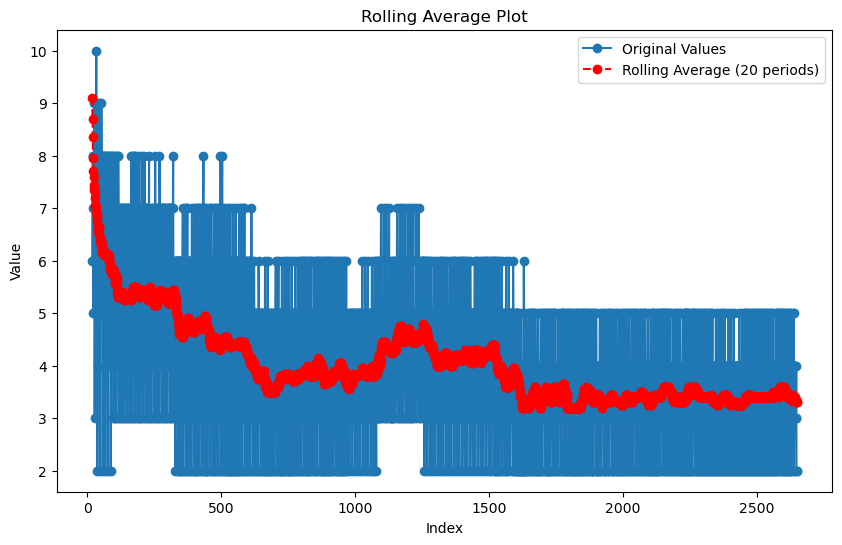

3.34
1.0316976301223144
3.43
1.0793979803575695
Gibb sampling on sample index:  0 outer it:  265
it:  0  || Likelihood:  -21912.197839961053  || n_components:  3
Gibb sampling on sample index:  1 outer it:  265
it:  0  || Likelihood:  -22777.314778886914  || n_components:  4
Gibb sampling on sample index:  2 outer it:  265
it:  0  || Likelihood:  -22115.843769180086  || n_components:  2
Gibb sampling on sample index:  3 outer it:  265
it:  0  || Likelihood:  -22374.898018262877  || n_components:  4
Gibb sampling on sample index:  4 outer it:  265
it:  0  || Likelihood:  -24426.250996382  || n_components:  4
Gibb sampling on sample index:  5 outer it:  265
it:  0  || Likelihood:  -22355.14148863239  || n_components:  3
Gibb sampling on sample index:  6 outer it:  265
it:  0  || Likelihood:  -22808.783915769272  || n_components:  3
Gibb sampling on sample index:  7 outer it:  265
it:  0  || Likelihood:  -23460.302041691346  || n_components:  4
Gibb sampling on sample index:  8 outer it: 

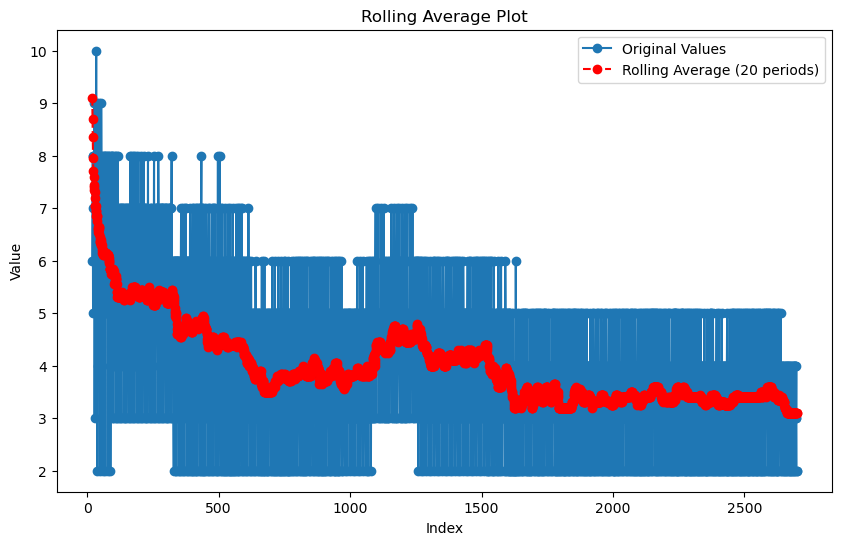

3.1
0.8306623862918074
3.22
0.9442457307290301
Gibb sampling on sample index:  0 outer it:  270
it:  0  || Likelihood:  -21926.064320515532  || n_components:  3
Gibb sampling on sample index:  1 outer it:  270
it:  0  || Likelihood:  -22778.203063306493  || n_components:  4
Gibb sampling on sample index:  2 outer it:  270
it:  0  || Likelihood:  -22113.221285055726  || n_components:  2
Gibb sampling on sample index:  3 outer it:  270
it:  0  || Likelihood:  -22330.575667233887  || n_components:  4
Gibb sampling on sample index:  4 outer it:  270
it:  0  || Likelihood:  -24409.139699731542  || n_components:  4
Gibb sampling on sample index:  5 outer it:  270
it:  0  || Likelihood:  -22345.58644637655  || n_components:  3
Gibb sampling on sample index:  6 outer it:  270
it:  0  || Likelihood:  -22809.58465176796  || n_components:  3
Gibb sampling on sample index:  7 outer it:  270
it:  0  || Likelihood:  -23471.82834633193  || n_components:  4
Gibb sampling on sample index:  8 outer it: 

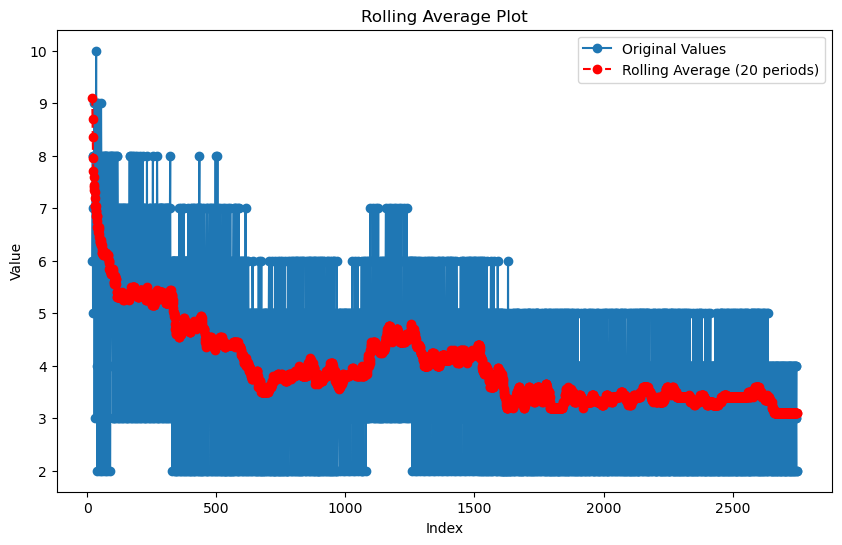

3.1
0.8306623862918074
3.1
0.8306623862918073
Gibb sampling on sample index:  0 outer it:  275
it:  0  || Likelihood:  -21939.820108817257  || n_components:  3
Gibb sampling on sample index:  1 outer it:  275
it:  0  || Likelihood:  -22689.01337116041  || n_components:  4
Gibb sampling on sample index:  2 outer it:  275
it:  0  || Likelihood:  -22126.20685831989  || n_components:  2
Gibb sampling on sample index:  3 outer it:  275
it:  0  || Likelihood:  -22334.420740665384  || n_components:  4
Gibb sampling on sample index:  4 outer it:  275
it:  0  || Likelihood:  -24405.249648160727  || n_components:  4
Gibb sampling on sample index:  5 outer it:  275
it:  0  || Likelihood:  -22323.232858181047  || n_components:  3
Gibb sampling on sample index:  6 outer it:  275
it:  0  || Likelihood:  -22822.090180067487  || n_components:  3
Gibb sampling on sample index:  7 outer it:  275
it:  0  || Likelihood:  -23466.749979884604  || n_components:  4
Gibb sampling on sample index:  8 outer it: 

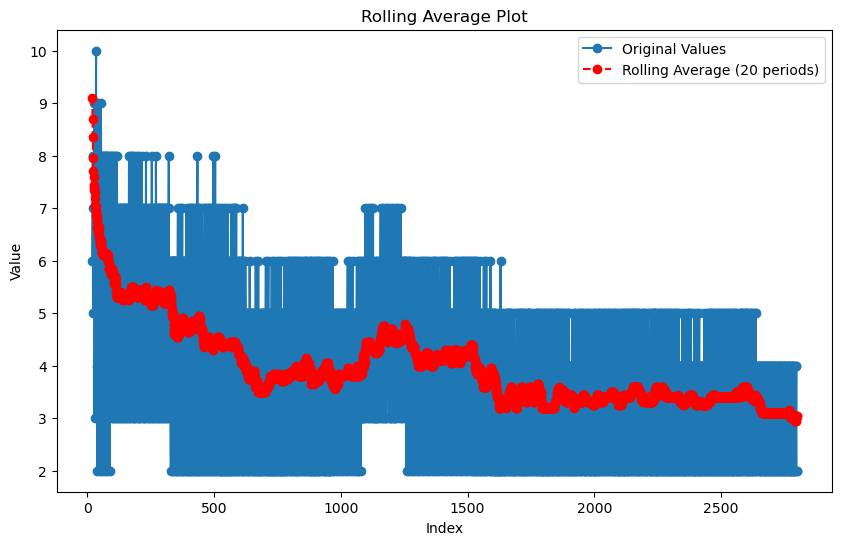

3.04
0.82365041127896
3.07
0.8277076778670113
Gibb sampling on sample index:  0 outer it:  280
it:  0  || Likelihood:  -21939.838644496245  || n_components:  3
Gibb sampling on sample index:  1 outer it:  280
it:  0  || Likelihood:  -22828.335804577997  || n_components:  3
Gibb sampling on sample index:  2 outer it:  280
it:  0  || Likelihood:  -22079.291277709337  || n_components:  3
Gibb sampling on sample index:  3 outer it:  280
it:  0  || Likelihood:  -22459.33498165646  || n_components:  4
Gibb sampling on sample index:  4 outer it:  280
it:  0  || Likelihood:  -24338.824581215424  || n_components:  4
Gibb sampling on sample index:  5 outer it:  280
it:  0  || Likelihood:  -22358.690431174153  || n_components:  3
Gibb sampling on sample index:  6 outer it:  280
it:  0  || Likelihood:  -22833.135501780554  || n_components:  3
Gibb sampling on sample index:  7 outer it:  280
it:  0  || Likelihood:  -23517.228523117363  || n_components:  4
Gibb sampling on sample index:  8 outer it:

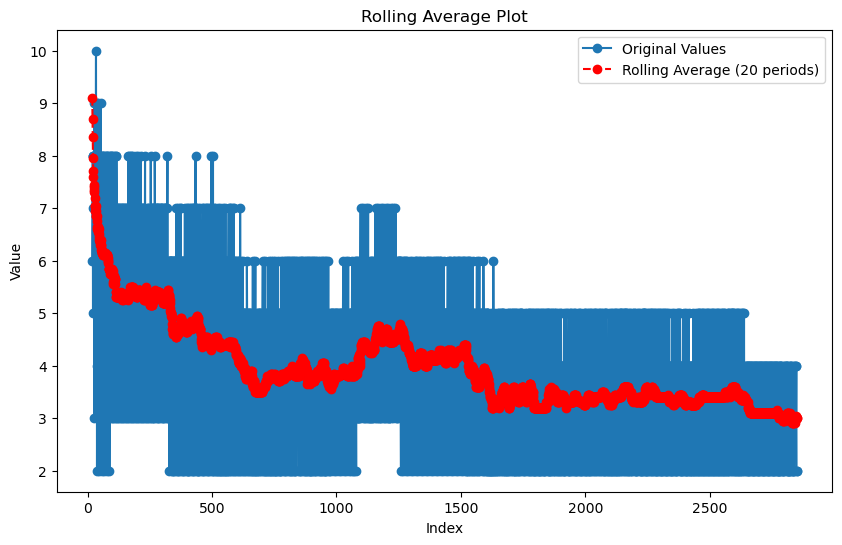

3.02
0.7613146524269712
3.03
0.793158243984137
Gibb sampling on sample index:  0 outer it:  285
it:  0  || Likelihood:  -21929.512598212386  || n_components:  3
Gibb sampling on sample index:  1 outer it:  285
it:  0  || Likelihood:  -22836.44998012987  || n_components:  3
Gibb sampling on sample index:  2 outer it:  285
it:  0  || Likelihood:  -22020.429528361135  || n_components:  3
Gibb sampling on sample index:  3 outer it:  285
it:  0  || Likelihood:  -22460.972283843672  || n_components:  4
Gibb sampling on sample index:  4 outer it:  285
it:  0  || Likelihood:  -24320.25197722975  || n_components:  4
Gibb sampling on sample index:  5 outer it:  285
it:  0  || Likelihood:  -22347.891488330635  || n_components:  3
Gibb sampling on sample index:  6 outer it:  285
it:  0  || Likelihood:  -22799.03025150504  || n_components:  3
Gibb sampling on sample index:  7 outer it:  285
it:  0  || Likelihood:  -23542.088625195418  || n_components:  4
Gibb sampling on sample index:  8 outer it: 

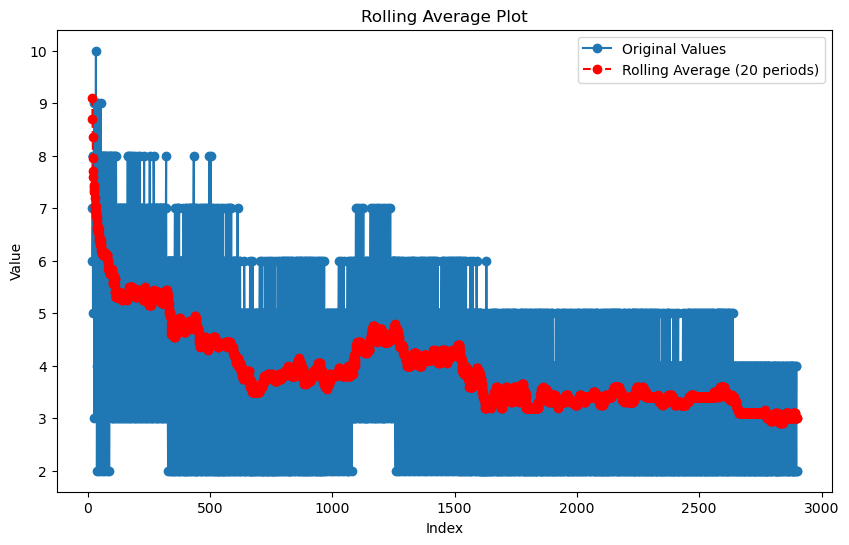

3.02
0.7345747068882783
3.02
0.7480641683706016
Gibb sampling on sample index:  0 outer it:  290
it:  0  || Likelihood:  -21946.540186726997  || n_components:  4
Gibb sampling on sample index:  1 outer it:  290
it:  0  || Likelihood:  -22854.04091337067  || n_components:  4
Gibb sampling on sample index:  2 outer it:  290
it:  0  || Likelihood:  -22113.01523090115  || n_components:  2
Gibb sampling on sample index:  3 outer it:  290
it:  0  || Likelihood:  -22462.134442258124  || n_components:  3
Gibb sampling on sample index:  4 outer it:  290
it:  0  || Likelihood:  -24314.958697491085  || n_components:  4
Gibb sampling on sample index:  5 outer it:  290
it:  0  || Likelihood:  -22325.1401108492  || n_components:  4
Gibb sampling on sample index:  6 outer it:  290
it:  0  || Likelihood:  -22829.042135333413  || n_components:  4
Gibb sampling on sample index:  7 outer it:  290
it:  0  || Likelihood:  -23539.61137084199  || n_components:  5
Gibb sampling on sample index:  8 outer it:  

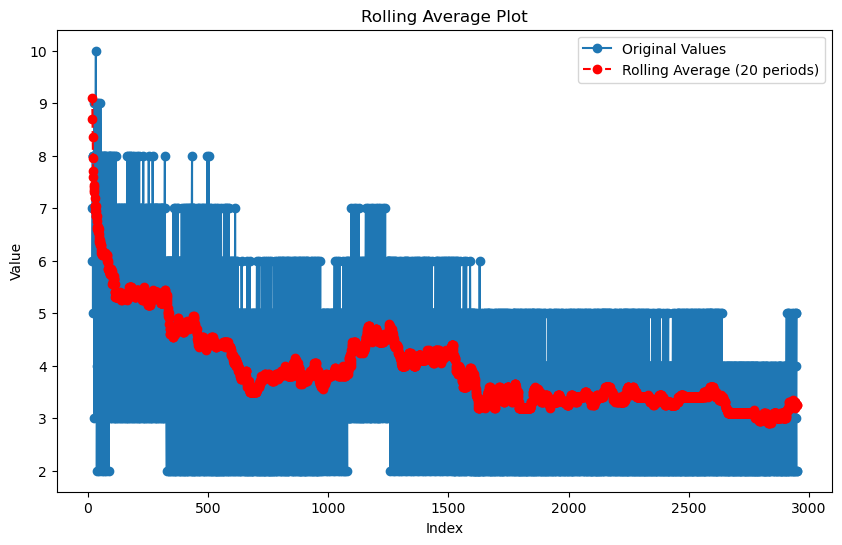

3.28
1.0007996802557444
3.15
0.8874119674649424
Gibb sampling on sample index:  0 outer it:  295
it:  0  || Likelihood:  -21942.95861368623  || n_components:  3
Gibb sampling on sample index:  1 outer it:  295
it:  0  || Likelihood:  -22846.558498057642  || n_components:  3
Gibb sampling on sample index:  2 outer it:  295
it:  0  || Likelihood:  -22129.686223389934  || n_components:  2
Gibb sampling on sample index:  3 outer it:  295
it:  0  || Likelihood:  -22416.818117895098  || n_components:  3
Gibb sampling on sample index:  4 outer it:  295
it:  0  || Likelihood:  -24197.010845906374  || n_components:  5
Gibb sampling on sample index:  5 outer it:  295
it:  0  || Likelihood:  -22354.3756276458  || n_components:  3
Gibb sampling on sample index:  6 outer it:  295
it:  0  || Likelihood:  -22815.354100423105  || n_components:  4
Gibb sampling on sample index:  7 outer it:  295
it:  0  || Likelihood:  -23500.043365428923  || n_components:  5
Gibb sampling on sample index:  8 outer it:

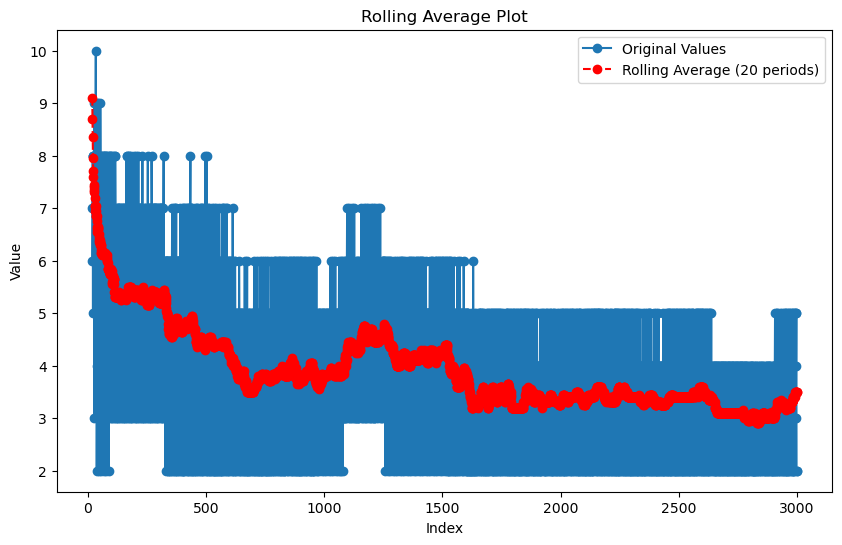

3.36
1.0910545357588686
3.32
1.0476640682967036
Gibb sampling on sample index:  0 outer it:  300
it:  0  || Likelihood:  -21950.37743179562  || n_components:  4
Gibb sampling on sample index:  1 outer it:  300
it:  0  || Likelihood:  -22775.863270648206  || n_components:  5
Gibb sampling on sample index:  2 outer it:  300
it:  0  || Likelihood:  -22056.081390240655  || n_components:  3
Gibb sampling on sample index:  3 outer it:  300
it:  0  || Likelihood:  -22452.19431950151  || n_components:  4
Gibb sampling on sample index:  4 outer it:  300
it:  0  || Likelihood:  -24425.986117803746  || n_components:  3
Gibb sampling on sample index:  5 outer it:  300
it:  0  || Likelihood:  -22353.79945050332  || n_components:  4
Gibb sampling on sample index:  6 outer it:  300
it:  0  || Likelihood:  -22812.2107139262  || n_components:  2
Gibb sampling on sample index:  7 outer it:  300
it:  0  || Likelihood:  -23515.556168704043  || n_components:  4
Gibb sampling on sample index:  8 outer it:  

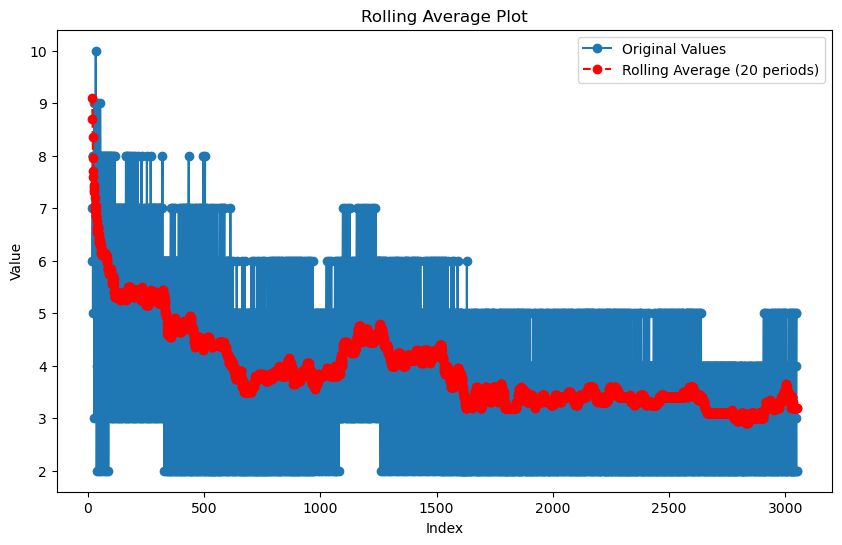

3.3
1.0630145812734648
3.33
1.0775435026020992
Gibb sampling on sample index:  0 outer it:  305
it:  0  || Likelihood:  -21912.823504794334  || n_components:  3
Gibb sampling on sample index:  1 outer it:  305
it:  0  || Likelihood:  -22864.077852224375  || n_components:  3
Gibb sampling on sample index:  2 outer it:  305
it:  0  || Likelihood:  -22106.09952030161  || n_components:  2
Gibb sampling on sample index:  3 outer it:  305
it:  0  || Likelihood:  -22441.72862262119  || n_components:  3
Gibb sampling on sample index:  4 outer it:  305
it:  0  || Likelihood:  -24197.47578406865  || n_components:  5
Gibb sampling on sample index:  5 outer it:  305
it:  0  || Likelihood:  -22347.58059086971  || n_components:  3
Gibb sampling on sample index:  6 outer it:  305
it:  0  || Likelihood:  -22847.000188600075  || n_components:  4
Gibb sampling on sample index:  7 outer it:  305
it:  0  || Likelihood:  -23505.79045410375  || n_components:  5
Gibb sampling on sample index:  8 outer it:  3

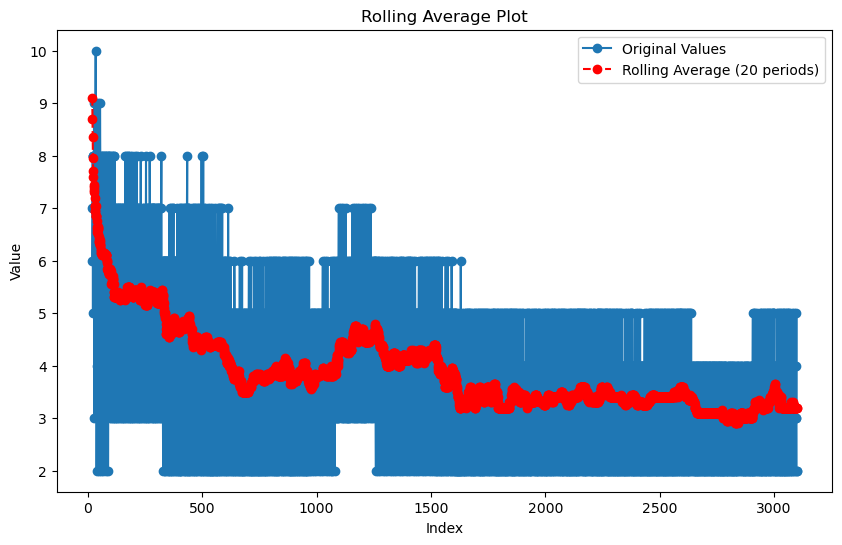

3.2
0.9591663046625438
3.25
1.0136567466356647
Gibb sampling on sample index:  0 outer it:  310
it:  0  || Likelihood:  -21918.00681686348  || n_components:  3
Gibb sampling on sample index:  1 outer it:  310
it:  0  || Likelihood:  -22835.580546219746  || n_components:  3
Gibb sampling on sample index:  2 outer it:  310
it:  0  || Likelihood:  -21953.360068406895  || n_components:  3
Gibb sampling on sample index:  3 outer it:  310
it:  0  || Likelihood:  -22456.881633728877  || n_components:  4
Gibb sampling on sample index:  4 outer it:  310
it:  0  || Likelihood:  -24360.51694298843  || n_components:  4
Gibb sampling on sample index:  5 outer it:  310
it:  0  || Likelihood:  -22340.52625197809  || n_components:  3
Gibb sampling on sample index:  6 outer it:  310
it:  0  || Likelihood:  -22828.436494657915  || n_components:  3
Gibb sampling on sample index:  7 outer it:  310
it:  0  || Likelihood:  -23510.921070386223  || n_components:  5
Gibb sampling on sample index:  8 outer it: 

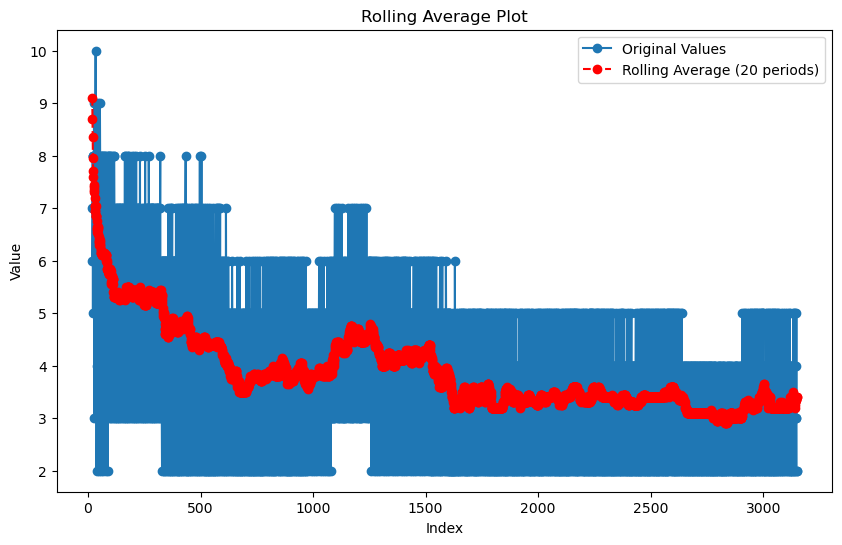

3.32
0.988736567544662
3.26
0.9759098319004681
Gibb sampling on sample index:  0 outer it:  315
it:  0  || Likelihood:  -21918.41354916753  || n_components:  3
Gibb sampling on sample index:  1 outer it:  315
it:  0  || Likelihood:  -22849.177399833105  || n_components:  3
Gibb sampling on sample index:  2 outer it:  315
it:  0  || Likelihood:  -21988.416066963346  || n_components:  3
Gibb sampling on sample index:  3 outer it:  315
it:  0  || Likelihood:  -22443.121931182915  || n_components:  4
Gibb sampling on sample index:  4 outer it:  315
it:  0  || Likelihood:  -24248.275225675392  || n_components:  5
Gibb sampling on sample index:  5 outer it:  315
it:  0  || Likelihood:  -22353.759064216098  || n_components:  3
Gibb sampling on sample index:  6 outer it:  315
it:  0  || Likelihood:  -22829.87144682293  || n_components:  4
Gibb sampling on sample index:  7 outer it:  315
it:  0  || Likelihood:  -23562.10766009751  || n_components:  5
Gibb sampling on sample index:  8 outer it: 

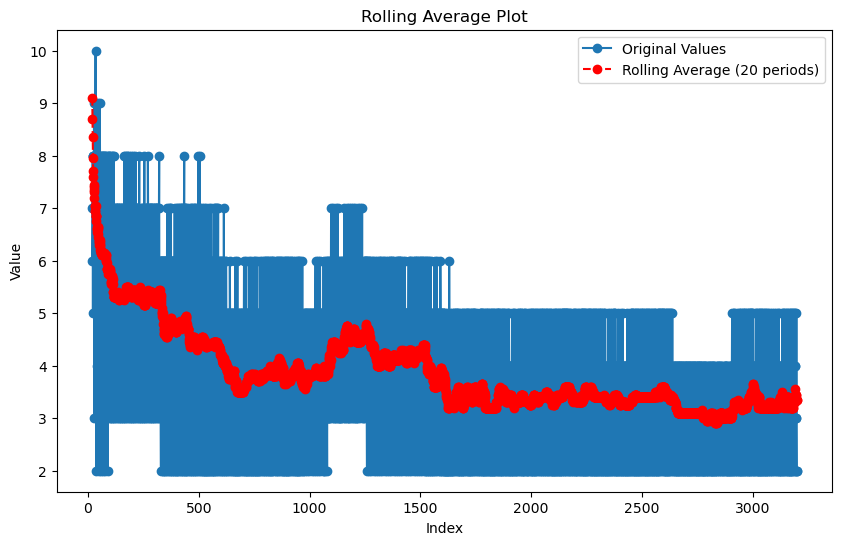

3.3
1.0630145812734648
3.31
1.0265963179361204
Gibb sampling on sample index:  0 outer it:  320
it:  0  || Likelihood:  -21928.17518325545  || n_components:  3
Gibb sampling on sample index:  1 outer it:  320
it:  0  || Likelihood:  -22818.061127020712  || n_components:  3
Gibb sampling on sample index:  2 outer it:  320
it:  0  || Likelihood:  -22038.523335699752  || n_components:  4
Gibb sampling on sample index:  3 outer it:  320
it:  0  || Likelihood:  -22433.83871465381  || n_components:  5
Gibb sampling on sample index:  4 outer it:  320
it:  0  || Likelihood:  -24439.318101847646  || n_components:  3
Gibb sampling on sample index:  5 outer it:  320
it:  0  || Likelihood:  -22325.56088668717  || n_components:  3
Gibb sampling on sample index:  6 outer it:  320
it:  0  || Likelihood:  -22829.41091161033  || n_components:  2
Gibb sampling on sample index:  7 outer it:  320
it:  0  || Likelihood:  -23490.95203822264  || n_components:  5
Gibb sampling on sample index:  8 outer it:  3

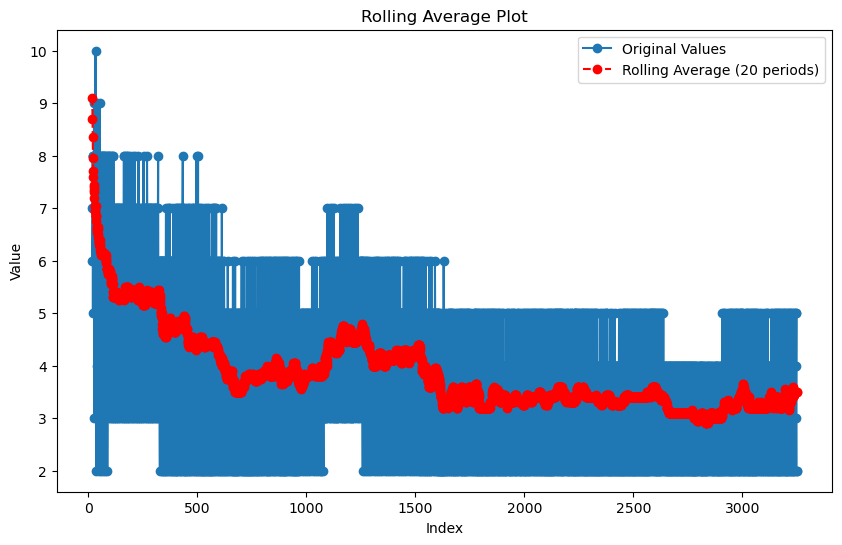

3.44
1.061319932913728
3.37
1.0644716999526105
Gibb sampling on sample index:  0 outer it:  325
it:  0  || Likelihood:  -21927.62661680073  || n_components:  4
Gibb sampling on sample index:  1 outer it:  325
it:  0  || Likelihood:  -22829.84755425288  || n_components:  4
Gibb sampling on sample index:  2 outer it:  325
it:  0  || Likelihood:  -22000.803545502888  || n_components:  3
Gibb sampling on sample index:  3 outer it:  325
it:  0  || Likelihood:  -22432.748517241005  || n_components:  4
Gibb sampling on sample index:  4 outer it:  325
it:  0  || Likelihood:  -24329.416742960846  || n_components:  4
Gibb sampling on sample index:  5 outer it:  325
it:  0  || Likelihood:  -22359.614258751666  || n_components:  4
Gibb sampling on sample index:  6 outer it:  325
it:  0  || Likelihood:  -22766.877237491924  || n_components:  4
Gibb sampling on sample index:  7 outer it:  325
it:  0  || Likelihood:  -23391.885979088514  || n_components:  5
Gibb sampling on sample index:  8 outer it:

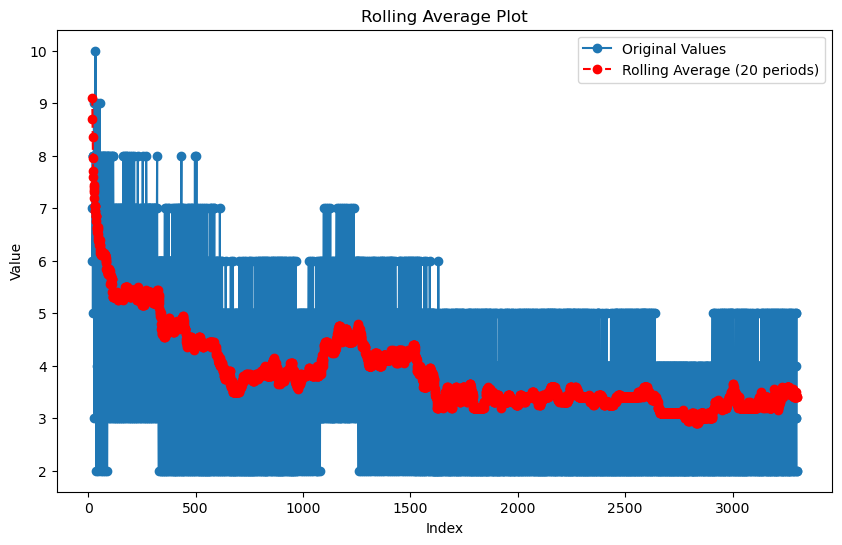

3.46
1.0041912168506553
3.45
1.0331989159885915
Gibb sampling on sample index:  0 outer it:  330
it:  0  || Likelihood:  -21900.37675877143  || n_components:  3
Gibb sampling on sample index:  1 outer it:  330
it:  0  || Likelihood:  -22800.549095971273  || n_components:  3
Gibb sampling on sample index:  2 outer it:  330
it:  0  || Likelihood:  -21987.552321516785  || n_components:  3
Gibb sampling on sample index:  3 outer it:  330
it:  0  || Likelihood:  -22436.239722782593  || n_components:  4
Gibb sampling on sample index:  4 outer it:  330
it:  0  || Likelihood:  -23960.29216023813  || n_components:  4
Gibb sampling on sample index:  5 outer it:  330
it:  0  || Likelihood:  -22330.383475498922  || n_components:  3
Gibb sampling on sample index:  6 outer it:  330
it:  0  || Likelihood:  -22712.602453823776  || n_components:  3
Gibb sampling on sample index:  7 outer it:  330
it:  0  || Likelihood:  -23191.002824596813  || n_components:  5
Gibb sampling on sample index:  8 outer it

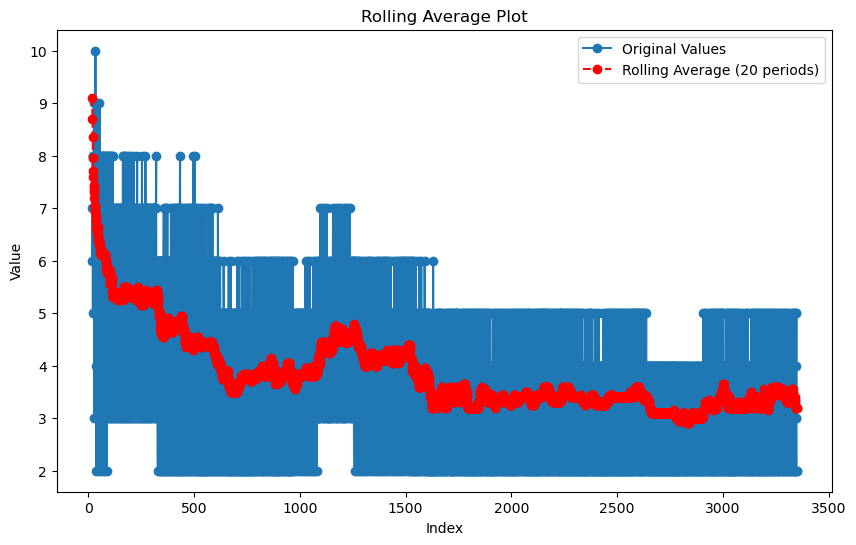

3.34
1.0121264743103995
3.4
1.0099504938362076
Gibb sampling on sample index:  0 outer it:  335
it:  0  || Likelihood:  -21946.083579696802  || n_components:  3
Gibb sampling on sample index:  1 outer it:  335
it:  0  || Likelihood:  -22842.526197544954  || n_components:  3
Gibb sampling on sample index:  2 outer it:  335
it:  0  || Likelihood:  -22138.652544667937  || n_components:  2
Gibb sampling on sample index:  3 outer it:  335
it:  0  || Likelihood:  -22429.386701636562  || n_components:  3
Gibb sampling on sample index:  4 outer it:  335
it:  0  || Likelihood:  -24203.683262856335  || n_components:  5
Gibb sampling on sample index:  5 outer it:  335
it:  0  || Likelihood:  -22361.463428616382  || n_components:  3
Gibb sampling on sample index:  6 outer it:  335
it:  0  || Likelihood:  -22806.9958347237  || n_components:  4
Gibb sampling on sample index:  7 outer it:  335
it:  0  || Likelihood:  -23535.476893144012  || n_components:  5
Gibb sampling on sample index:  8 outer it:

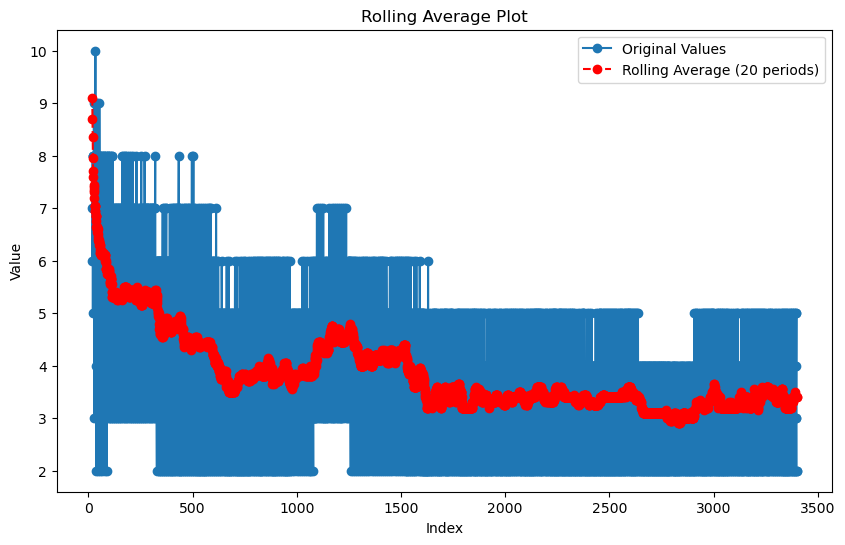

3.32
1.085172797300043
3.33
1.0493331215586403
Gibb sampling on sample index:  0 outer it:  340
it:  0  || Likelihood:  -21917.496842619486  || n_components:  3
Gibb sampling on sample index:  1 outer it:  340
it:  0  || Likelihood:  -22804.52759128852  || n_components:  3
Gibb sampling on sample index:  2 outer it:  340
it:  0  || Likelihood:  -21967.337330111946  || n_components:  3
Gibb sampling on sample index:  3 outer it:  340
it:  0  || Likelihood:  -22427.220060356867  || n_components:  4
Gibb sampling on sample index:  4 outer it:  340
it:  0  || Likelihood:  -23940.946117624408  || n_components:  5
Gibb sampling on sample index:  5 outer it:  340
it:  0  || Likelihood:  -22332.51395723107  || n_components:  3
Gibb sampling on sample index:  6 outer it:  340
it:  0  || Likelihood:  -22755.058712977145  || n_components:  4
Gibb sampling on sample index:  7 outer it:  340
it:  0  || Likelihood:  -23273.82068756506  || n_components:  5
Gibb sampling on sample index:  8 outer it: 

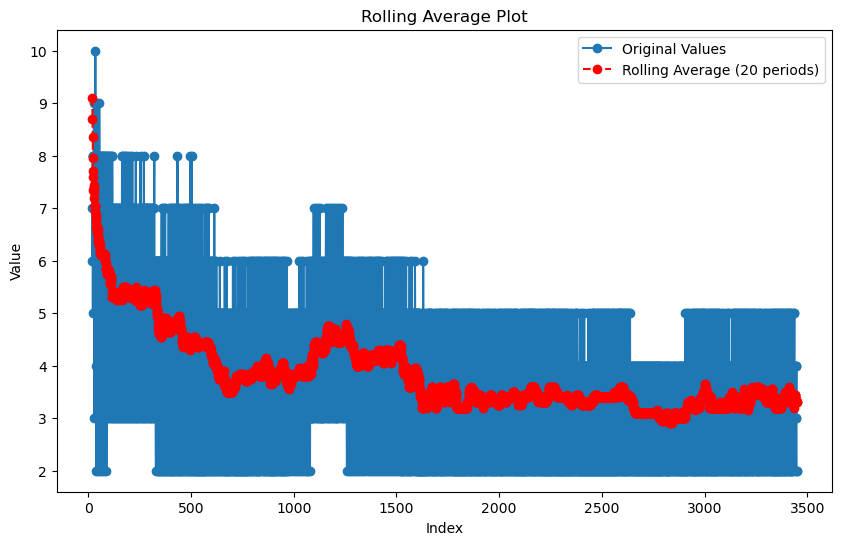

3.36
0.9748846085563152
3.34
1.0316976301223144
Gibb sampling on sample index:  0 outer it:  345
it:  0  || Likelihood:  -21932.08470155434  || n_components:  3
Gibb sampling on sample index:  1 outer it:  345
it:  0  || Likelihood:  -22856.013284116056  || n_components:  3
Gibb sampling on sample index:  2 outer it:  345
it:  0  || Likelihood:  -22080.287577112213  || n_components:  3
Gibb sampling on sample index:  3 outer it:  345
it:  0  || Likelihood:  -22442.720691988125  || n_components:  4
Gibb sampling on sample index:  4 outer it:  345
it:  0  || Likelihood:  -24276.63902104961  || n_components:  4
Gibb sampling on sample index:  5 outer it:  345
it:  0  || Likelihood:  -22328.17823417767  || n_components:  3
Gibb sampling on sample index:  6 outer it:  345
it:  0  || Likelihood:  -22829.464844295344  || n_components:  3
Gibb sampling on sample index:  7 outer it:  345
it:  0  || Likelihood:  -23483.565529051157  || n_components:  4
Gibb sampling on sample index:  8 outer it:

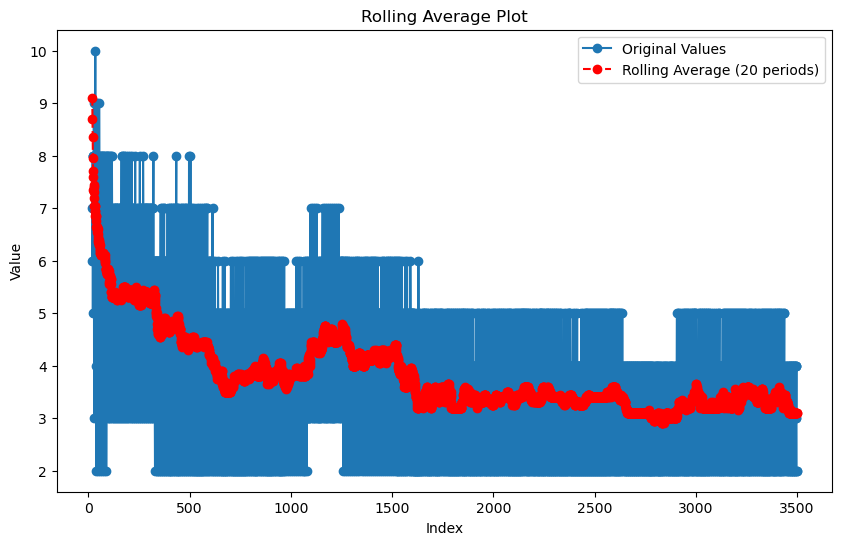

3.1
0.806225774829855
3.23
0.903935838431025
Gibb sampling on sample index:  0 outer it:  350
it:  0  || Likelihood:  -21938.460902308307  || n_components:  3
Gibb sampling on sample index:  1 outer it:  350
it:  0  || Likelihood:  -22769.18486964221  || n_components:  4
Gibb sampling on sample index:  2 outer it:  350
it:  0  || Likelihood:  -22126.17745330753  || n_components:  2
Gibb sampling on sample index:  3 outer it:  350
it:  0  || Likelihood:  -22381.992505702317  || n_components:  4
Gibb sampling on sample index:  4 outer it:  350
it:  0  || Likelihood:  -24380.64443236891  || n_components:  4
Gibb sampling on sample index:  5 outer it:  350
it:  0  || Likelihood:  -22337.178045197074  || n_components:  3
Gibb sampling on sample index:  6 outer it:  350
it:  0  || Likelihood:  -22829.013878367146  || n_components:  3
Gibb sampling on sample index:  7 outer it:  350
it:  0  || Likelihood:  -23490.238294077073  || n_components:  4
Gibb sampling on sample index:  8 outer it:  3

KeyboardInterrupt: 

In [20]:
hdp_hmm.fit_multiple(verbose=True, outer_its=1000, iterations=1, burn_in=1)

# plt.plot(range(0,len(hdp_hmm.trace[const.TIME])), hdp_hmm.trace[const.TIME], marker="None")
# plt.xlabel('iteration')
# plt.ylabel('ARI')
# plt.xlim(0,1)
# #plt.savefig("./image/ari.png")
# plt.show()
# plt.close()
print('average time for one gibbs sweep: ', np.mean(hdp_hmm.trace[const.TIME]))

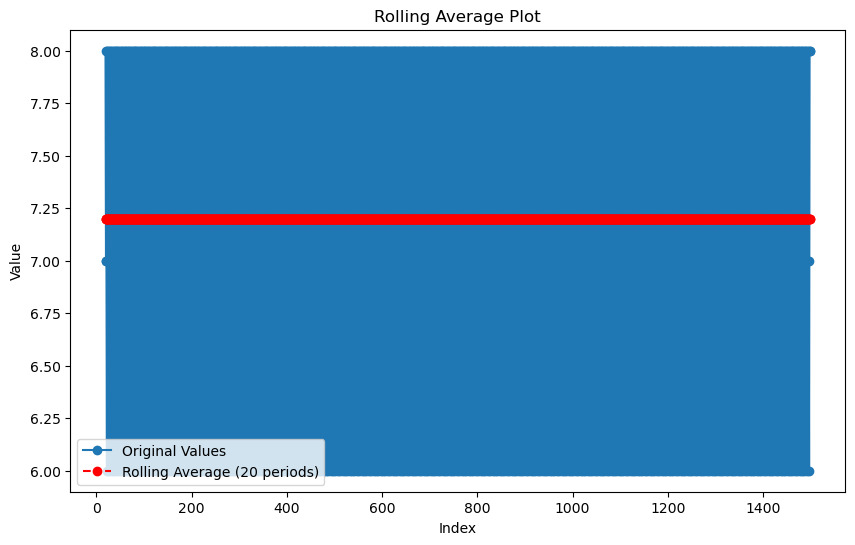

In [160]:
import matplotlib.pyplot as plt

data = hdp_hmm.trace['n_components_all']
# Define the window size for the rolling average
window_size = 20

# Create a kernel for the rolling average
kernel = np.ones(window_size) / window_size

# Use np.convolve to calculate the rolling average
rolling_avg = np.convolve(data, kernel, mode='valid')

# Create an array of indices corresponding to the original data for plotting
indices = np.arange(window_size - 1, len(data))

# Plot the data and rolling average
plt.figure(figsize=(10, 6))
plt.plot(indices, data[window_size - 1:], label='Original Values', marker='o')
plt.plot(indices, rolling_avg, label=f'Rolling Average ({window_size} periods)', color='red', linestyle='--', marker='o')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Rolling Average Plot')
plt.legend()
plt.show()

In [21]:
np.mean(hdp_hmm.trace['n_components'])

3.845082433200682

In [22]:
trace = hdp_hmm.trace

In [23]:
nk = np.copy(trace['nk'])[-100:]
nk_sum = np.sum(nk, axis=0)

In [24]:
from hmmlearn.hmm import GaussianHMM
# create am hmm from the trace
def hmm_from_trace(n_components, average_over=100):

    # from the last 'average_over' its, get the sum
    nk = np.copy(trace['nk'])[-average_over:]
    nk_sum = np.sum(nk, axis=0)

    largest_indices = np.argpartition(nk_sum, -n_components)[-n_components:]
    # nk_sum_norm = (nk_sum / np.sum(nk_sum)) * 100

    mu_matrix = np.mean(np.array(trace['mu'][-average_over:]), axis=0)[largest_indices]
    sigma_matrix = np.mean(np.array(trace['covar'][-average_over:]), axis=0)[largest_indices]
    A = np.mean(np.array(trace['A'][-average_over:]), axis=0)[largest_indices][:, largest_indices]
    pi = np.mean(np.array(trace['pie'][-average_over:]), axis=0)[largest_indices]

    hmm_trace = GaussianHMM(len(largest_indices), covariance_type='diag')
    hmm_trace.n_features = mu_matrix.shape[1]
    hmm_trace.transmat_, hmm_trace.startprob_, hmm_trace.means_ = hdp_hmm.normalize_matrix(A), hdp_hmm.normalize_matrix(pi), mu_matrix
    hmm_trace.covars_ = np.array([np.diag(i) for i in sigma_matrix])

    return hmm_trace

new_hmm_trace = hmm_from_trace(5, average_over=100)
# rem_ind = zero_indices.astype(int)
# A = A[rem_ind][:, rem_ind]
# pi = pi[rem_ind]
# means = means[rem_ind]
# covar = covar[rem_ind]
# n_components = len(rem_ind)

In [31]:
# save humpback whale pickle

# print("Writing to pickle file: " + BASENAME + ".pkl")
output = open('NoiseWhaleHMM' + ".pkl", "wb")
pickle.dump(new_hmm_trace, output)

In [165]:
# hmm check
# with open('/Users/david/Documents/mastersCode/ubm/final/models/hdphmm/hdphmmwl/testing/BowheadWhaleHMM.pkl', 'rb') as file:
#     hmm_check = pickle.load(file)

In [115]:
mu_smaller = trace['mu'][-300:]
# index 2 is largest

In [116]:
feature_index_a = 14
feature_index_b = 15
mu_feature_index_a = []
mu_feature_index_b = []
for i in range(len(mu_smaller)):
    curr_mu = mu_smaller[i]
    mu_feature_index_a.append(curr_mu[14][14])
    mu_feature_index_b.append(curr_mu[14][15])

In [ ]:
import matplotlib.pyplot as plt

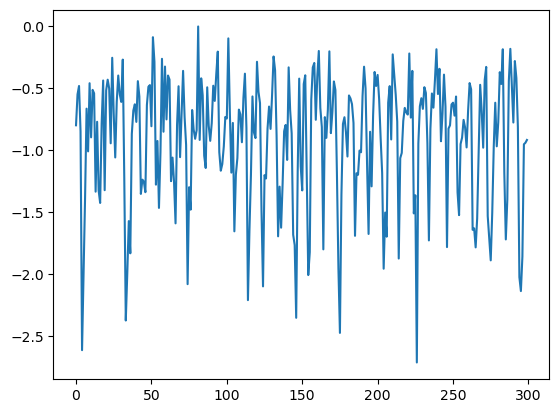

In [117]:
# plt.scatter(mu_feature_index_a, mu_feature_index_b)
plt.plot(mu_feature_index_a)
plt.show()

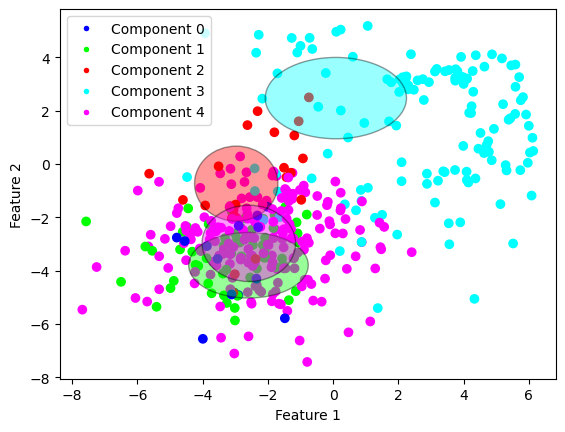

In [119]:
plot_hmm.plot_hmm_learn(concatenated_list[0], hdp_hmm.hmm, 5, 14, 16)

In [25]:
from hmmlearn.hmm import GaussianHMM
hdp_hmm.create_hmm()
hmm_hdp_diag = hdp_hmm.hmm
hdp_hmm.create_hmm('full')
hmm_hdp_full = hdp_hmm.hmm
hdp_hmm.create_hmm()

In [26]:
hmm_hdp_diag.fit(np.concatenate(train_filtered_features))
hmm_hdp_full.fit(np.concatenate(train_filtered_features))

GaussianHMM(covariance_type='full', init_params='', n_components=2)

In [27]:
hmm_em_diag = GaussianHMM(5, covariance_type='diag')
hmm_em_diag.fit(np.concatenate(train_filtered_features))
hmm_em_full = GaussianHMM(5, covariance_type='full')
hmm_em_full.fit(np.concatenate(train_filtered_features))

GaussianHMM(covariance_type='full', n_components=5)

In [28]:
print('hdp_hmm          ', hdp_hmm.hmm.score(test_filtered_features[0]))
print('hdp_hmm trace:   ', new_hmm_trace.score(test_filtered_features[0]))
print('hdp_hmm diag:    ', hmm_hdp_diag.score(test_filtered_features[0]))
print('hdp_hmm full:    ', hmm_hdp_full.score(test_filtered_features[0]))
print('hmm_em diag:     ', hmm_em_diag.score(test_filtered_features[0]))
print('hmm_em full:     ', hmm_em_full.score(test_filtered_features[0]))

hdp_hmm           -39570.36789360779
hdp_hmm trace:    -39185.24792492662
hdp_hmm diag:     -39185.39937316695
hdp_hmm full:     -37247.746620267055
hmm_em diag:      -38732.71457642562
hmm_em full:      -37310.40653113629


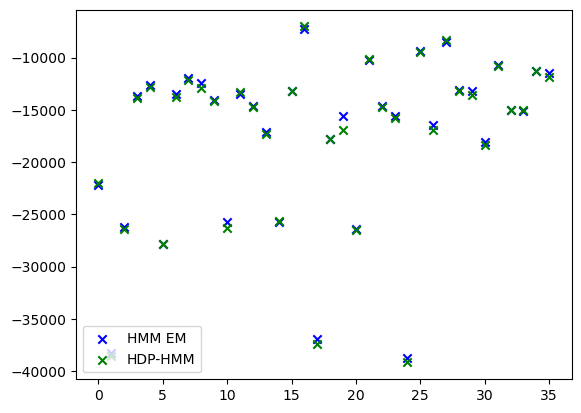

In [29]:
hmm_em_diag_lik = []
hmm_em_full_lik = []
hdp_hmm_lik = []
hdp_hmm_trace_lik = []
hmm_hdp_diag_lik = []
hmm_hdp_covar_lik = []

val_test_concat = val_filtered_features + test_filtered_features

for i in range(len(val_test_concat)):
    hmm_em_diag_lik.append(hmm_em_diag.score(val_test_concat[i]))
    hmm_em_full_lik.append(hmm_em_full.score(val_test_concat[i]))
    hdp_hmm_lik.append(hdp_hmm.hmm.score(val_test_concat[i]))
    hdp_hmm_trace_lik.append(new_hmm_trace.score(val_test_concat[i]))
    hmm_hdp_diag_lik.append(hmm_hdp_diag.score(val_test_concat[i]))
    hmm_hdp_covar_lik.append(hmm_hdp_full.score(val_test_concat[i]))

import matplotlib.pyplot as plt
x_axis = np.arange(len(hdp_hmm_lik))
plt.xlim()

# plt.scatter(x_axis, hmm_hdp_covar_lik, label='HDP-HMM EM full', c='r', marker='o')
# plt.scatter(x_axis, hmm_hdp_diag_lik, label='HDP-HMM Em diag', c='r', marker='o')
#
# plt.scatter(x_axis, hmm_em_full_lik, label='HMM full', c='blue', marker='x')
plt.scatter(x_axis, hmm_em_diag_lik, label='HMM EM', c='blue', marker='x')

# plt.scatter(x_axis, hdp_hmm_lik, label='HDP-HMM', c='grey')
plt.scatter(x_axis, hdp_hmm_trace_lik, label='HDP-HMM', c='g', marker='x')

plt.legend(loc='lower left')

In [126]:
np.exp(hdp_hmm_lik[1])

0.0

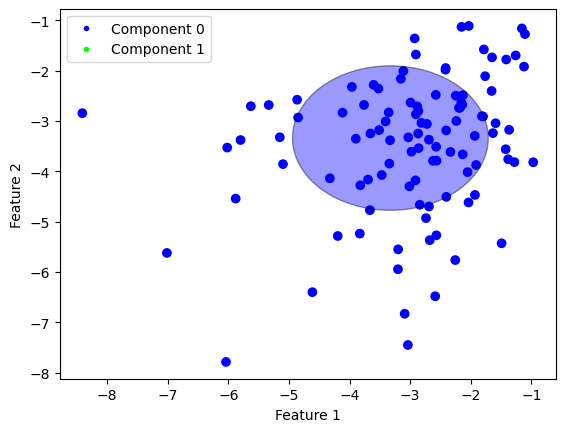

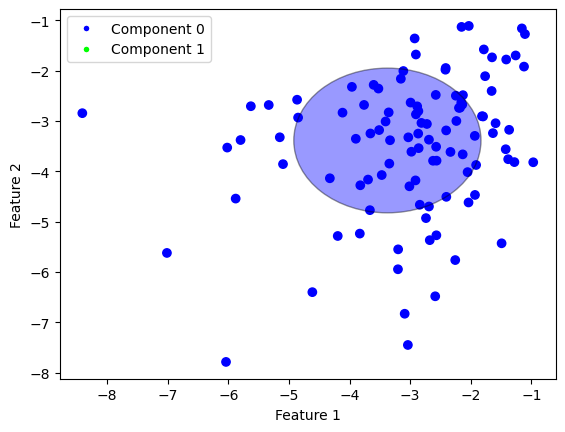

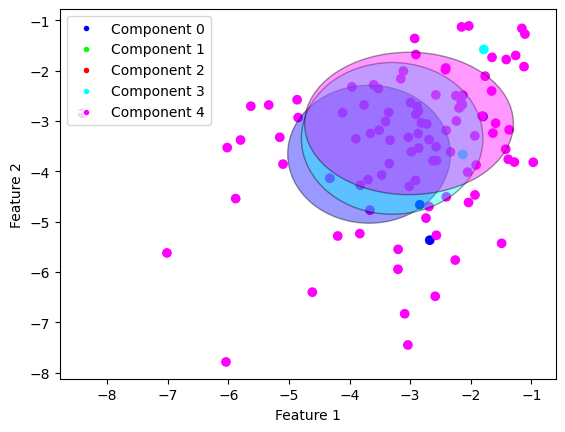

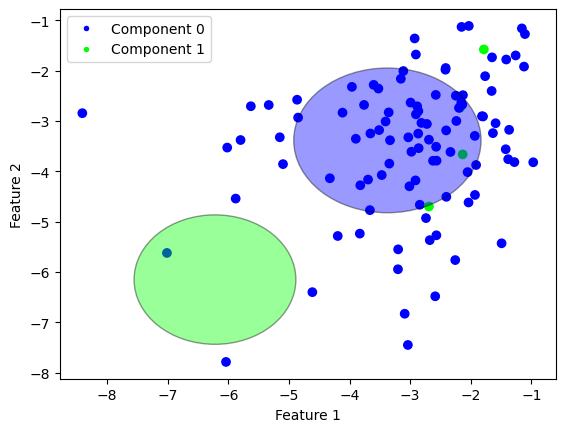

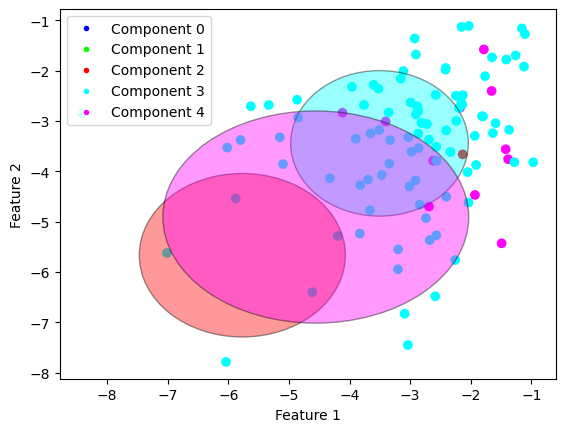

In [30]:
import final.models.hdphmm.helpers.plot_hmm as plot_hmm
reload(plot_hmm)
plot_hmm.plot_hmm_learn(test_filtered_features[-1], hdp_hmm.hmm, 0.1, 14, 13)
plot_hmm.plot_hmm_learn(test_filtered_features[-1], hmm_hdp_diag, 0.1, 14, 13)
plot_hmm.plot_hmm_learn(test_filtered_features[-1], hmm_em_diag, 0.1, 14, 13)
plot_hmm.plot_hmm_learn(test_filtered_features[-1], hmm_hdp_full, 0.1, 14, 13)
plot_hmm.plot_hmm_learn(test_filtered_features[-1], hmm_em_full, 0.1, 14, 13)

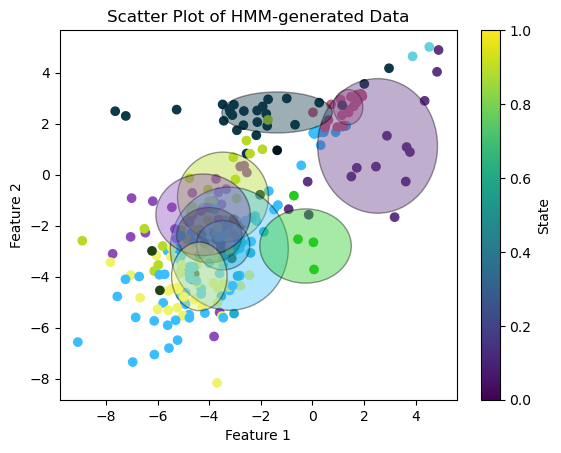

In [105]:
plot_hmm.plot_hmm_data(aic_states_humpback[3], hdp_hmm.Z, hdp_hmm.K, hdp_hmm.mu, hdp_hmm.sigma, counts=hdp_hmm.nk, percent=1,feature_a=11, feature_b=12)

In [46]:
gibbs_hmm = hdp_hmm.hmm
em_hmm = GaussianHMM(10, covariance_type='diag')
em_hmm.fit(smaller_features)
ll_gibbs, _ = gibbs_hmm.decode(smaller_features)
ll_em, ss_em = em_hmm.decode(smaller_features)
print('gibbs: ', ll_gibbs, 'em: ', ll_em)

gibbs:  -26370.479803144364 em:  -26718.644665980133


In [47]:
gibbs_hmm.fit(smaller_features)

GaussianHMM(init_params='', n_components=18)

In [48]:
ll_gibbs, _ = gibbs_hmm.decode(smaller_features)
ll_em, ss_em = em_hmm.decode(smaller_features)
print('gibbs: ', ll_gibbs, 'em: ', ll_em)

gibbs:  -24635.587943985214 em:  -26718.644665980133


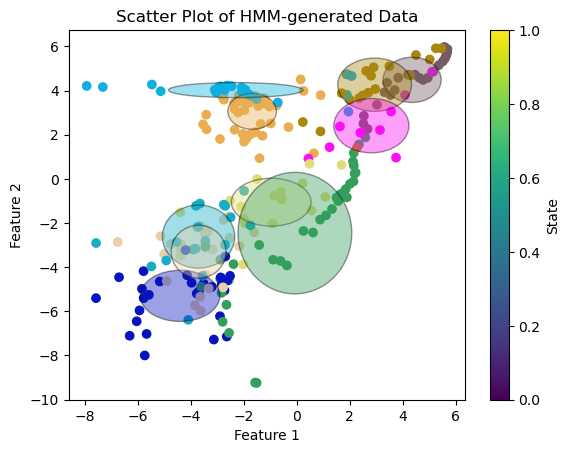

In [49]:
import final.models.hdphmm.helpers.plot_hmm as plot_hmm
reload(plot_hmm)
plot_hmm.plot_hmm_data(smaller_features, ss_em, em_hmm.n_components, em_hmm.means_, em_hmm.covars_, feature_a=11, feature_b=12)